In [1]:
import pandas as pd
import statsmodels.api as sm
% pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
le = pd.read_csv('IHME_USA_LIFE_EXPECTANCY_1985_2010.csv')

In [3]:
le.head()

,State,Year,"Female life expectancy (state, years)","Male life expectancy (state, years)"
0,Alabama,1985,76.90,69.06
1,Alabama,1986,76.90,69.10
2,Alabama,1987,77.04,69.16
3,Alabama,1988,76.95,69.12
4,Alabama,1989,76.98,69.22


In [4]:
le = le.rename(columns={'Female life expectancy (state, years)':'female_le', 'Male life expectancy (state, years)':\
                       'male_le'})

In [5]:
states = []
for elem in le['State'].unique():
    states.append(le[le['State'] == elem])

In [6]:
states[0].head()

,State,Year,female_le,male_le
0,Alabama,1985,76.90,69.06
1,Alabama,1986,76.90,69.10
2,Alabama,1987,77.04,69.16
3,Alabama,1988,76.95,69.12
4,Alabama,1989,76.98,69.22


In [7]:
model_fit_f = []
model_fit_m = []
projections_f = []
projections_m = []
model_names_f = []
model_names_m = []
coefs_m = []
coefs_f = []

for elem in le['State'].unique():
    temp = le[le['State'] == elem]
    
    modelf = sm.OLS(temp['female_le'], sm.add_constant(temp['Year'])).fit()
    projections_f.append(modelf.predict(sm.add_constant([i for i in range(1950,2101)])))
    model_fit_f.append(modelf.rsquared)
    
    model_names_f.append((elem, modelf.rsquared))
    coefs_f.append((elem, modelf.params[1]))
    
    modelm = sm.OLS(temp['male_le'], sm.add_constant(temp['Year'])).fit()
    model_fit_m.append(modelm.rsquared)
    projections_m.append(modelm.predict(sm.add_constant([i for i in range(1950,2101)])))
                
    model_names_m.append((elem, modelm.rsquared))
    coefs_m.append((elem, modelm.params[1]))

In [8]:
print max(coefs_f,key=lambda item:item[1])
print min(coefs_f,key=lambda item:item[1])
print max(coefs_m,key=lambda item:item[1])
print min(coefs_m,key=lambda item:item[1])

('District of Columbia', 0.23119316239315421)
('Oklahoma', -0.012666666666663995)
('District of Columbia', 0.46986324786322764)
('Oklahoma', 0.090283760683759595)


In [9]:
print sorted(coefs_f,key=lambda item:item[1])

[('Oklahoma', -0.012666666666663995), ('Alabama', 0.026232478632478351), ('Mississippi', 0.026635897435897782), ('Arkansas', 0.031541880341881379), ('West Virginia', 0.034680341880342136), ('Kentucky', 0.038854700854701607), ('Tennessee', 0.040235897435898116), ('Kansas', 0.041370940170941117), ('Wyoming', 0.053524786324786522), ('Missouri', 0.055483760683760042), ('Louisiana', 0.058700854700854455), ('Montana', 0.059282051282051107), ('Utah', 0.064796581196581382), ('Indiana', 0.065227350427350173), ('Idaho', 0.065928205128204187), ('North Dakota', 0.069558974358974179), ('South Dakota', 0.06993504273504253), ('Iowa', 0.073299145299144886), ('Alaska', 0.076068376068376131), ('Nebraska', 0.078324786324785067), ('Ohio', 0.079524786324784769), ('New Mexico', 0.079753846153845509), ('Texas', 0.082779487179486466), ('Oregon', 0.084799999999998432), ('Wisconsin', 0.091873504273502438), ('North Carolina', 0.093794871794869727), ('Colorado', 0.094905982905980679), ('Maine', 0.0974529914529906

In [10]:
print sorted(coefs_m,key=lambda item:item[1])

[('Oklahoma', 0.090283760683759595), ('West Virginia', 0.12649230769230535), ('Mississippi', 0.1299829059829021), ('Hawaii', 0.13230427350427099), ('Arkansas', 0.13379487179486932), ('Alabama', 0.13452991452991098), ('Kansas', 0.14205470085469846), ('Louisiana', 0.14690598290597964), ('Kentucky', 0.14874188034187713), ('Tennessee', 0.15224615384615051), ('Wyoming', 0.1559794871794849), ('New Mexico', 0.15869743589743299), ('Utah', 0.16019829059828822), ('Indiana', 0.1609572649572617), ('North Dakota', 0.16283418803418481), ('Ohio', 0.16309401709401436), ('Missouri', 0.16396239316238903), ('Montana', 0.1671623931623894), ('Idaho', 0.17368205128204811), ('Iowa', 0.17877606837606455), ('Wisconsin', 0.18370940170939778), ('South Dakota', 0.18591794871794487), ('Nebraska', 0.18700512820512452), ('Alaska', 0.19115555555555208), ('Colorado', 0.19386324786324355), ('Maine', 0.19501196581196212), ('Pennsylvania', 0.19816410256409894), ('Arizona', 0.20159658119657639), ('Oregon', 0.2027487179487

In [11]:
print max(model_names_f,key=lambda item:item[1])
print min(model_names_f,key=lambda item:item[1])
print max(model_names_m,key=lambda item:item[1])
print min(model_names_m,key=lambda item:item[1])

('New York', 0.99035287111186576)
('Oklahoma', 0.29891573289693329)
('Nebraska', 0.99720274018891508)
('District of Columbia', 0.83220729142209326)


In [12]:
print sorted(model_names_m,key=lambda item:item[1])

[('District of Columbia', 0.83220729142209326), ('Louisiana', 0.93862277678827999), ('Mississippi', 0.93949631619301621), ('West Virginia', 0.94731310267642022), ('Oklahoma', 0.97206919344105869), ('New York', 0.97241232834794733), ('New Mexico', 0.97519824482528439), ('Hawaii', 0.97705510559760722), ('Arkansas', 0.97950923527728118), ('Arizona', 0.98040487430053536), ('Alabama', 0.98053286792260996), ('Nevada', 0.98093336294381461), ('Illinois', 0.98121799343854021), ('California', 0.98153188065849384), ('Utah', 0.98154411000800579), ('Rhode Island', 0.98240468221009736), ('Missouri', 0.98284285523293047), ('Maryland', 0.98342517220471926), ('Florida', 0.98344731523436901), ('Tennessee', 0.98402052495841119), ('Texas', 0.98588475203901182), ('Maine', 0.98684737267059752), ('Kentucky', 0.98732057871048184), ('Alaska', 0.98833922655207773), ('Wyoming', 0.98841324902935745), ('Georgia', 0.98870255709573474), ('Colorado', 0.98960155079144774), ('Delaware', 0.98963959155371584), ('Connecti

In [13]:
print sorted(model_names_f,key=lambda item:item[1])

[('Oklahoma', 0.29891573289693329), ('Mississippi', 0.5014272039731047), ('Tennessee', 0.72123754435994258), ('Alabama', 0.7570028181111339), ('Arkansas', 0.7621748364959593), ('Kansas', 0.77424861031966308), ('Louisiana', 0.80892340703423704), ('Utah', 0.81633308113824365), ('Kentucky', 0.82029841769745271), ('West Virginia', 0.84439271447749675), ('Missouri', 0.85813777929934298), ('Wyoming', 0.85835479480021881), ('North Dakota', 0.88515572559041722), ('Oregon', 0.89318965956529461), ('Alaska', 0.91169817060931035), ('Indiana', 0.91705088654327815), ('Texas', 0.91771178689252675), ('District of Columbia', 0.92342913157216033), ('Colorado', 0.92479098472989707), ('Arizona', 0.93113653032169141), ('Montana', 0.93266927599510818), ('Idaho', 0.93370356811967492), ('South Dakota', 0.93647898725044043), ('Georgia', 0.93835283448114981), ('Maine', 0.94015176635186859), ('Nebraska', 0.94061473240223137), ('North Carolina', 0.94090263329689061), ('Nevada', 0.94267676698180902), ('Ohio', 0.94

/Users/kristikorsberg/devel/venv/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


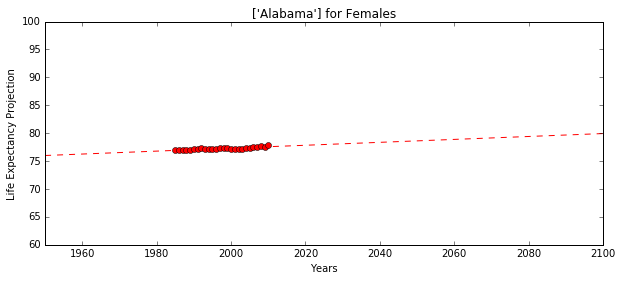

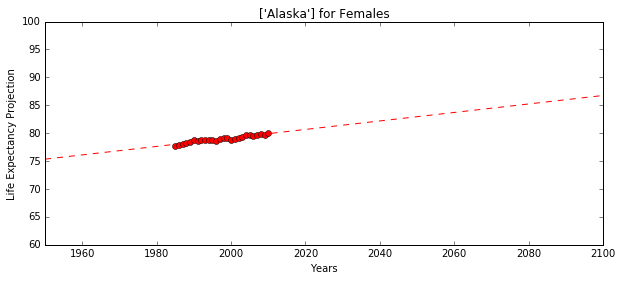

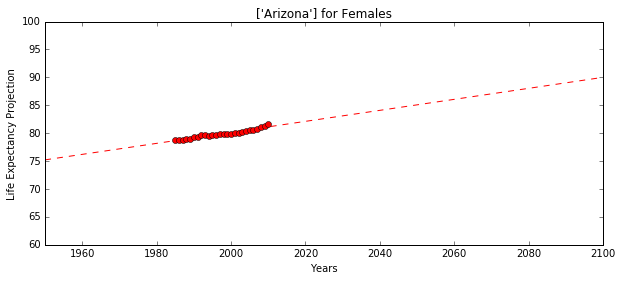

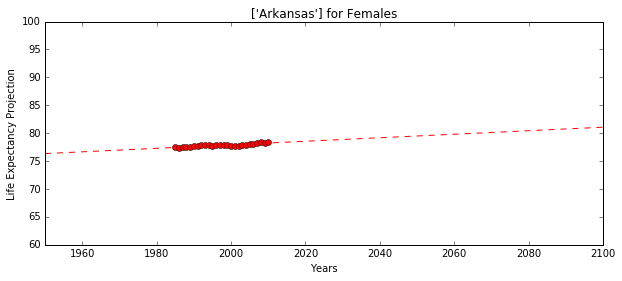

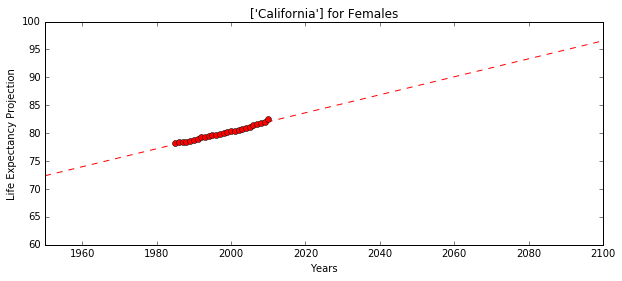

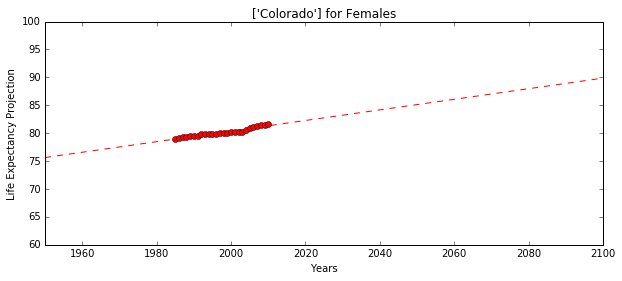

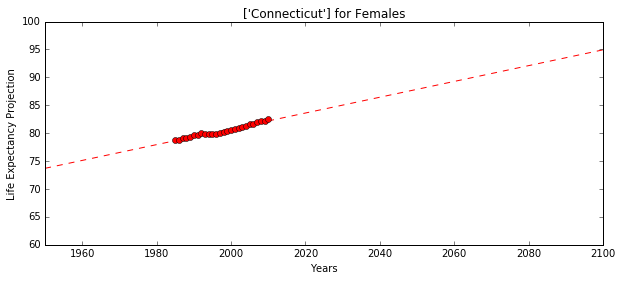

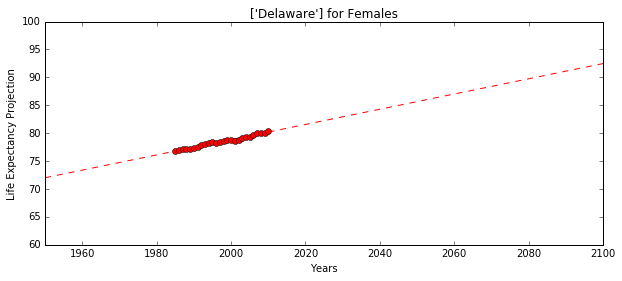

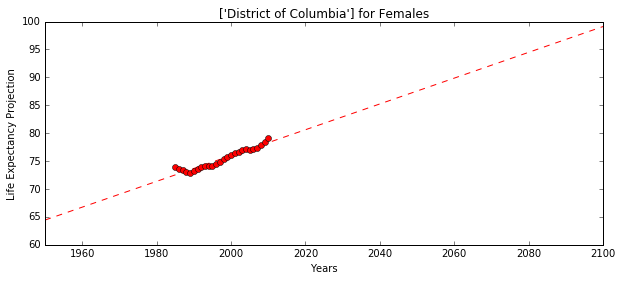

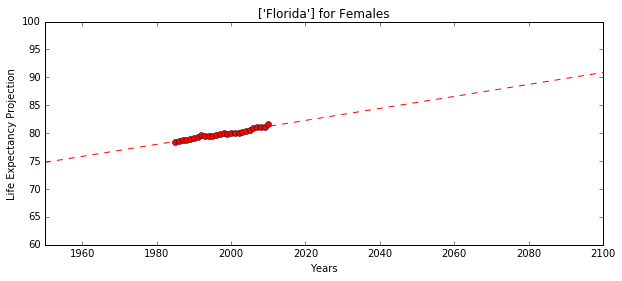

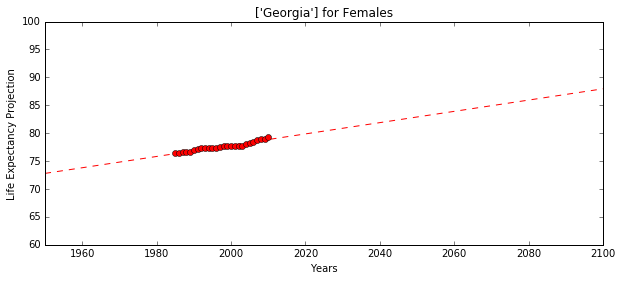

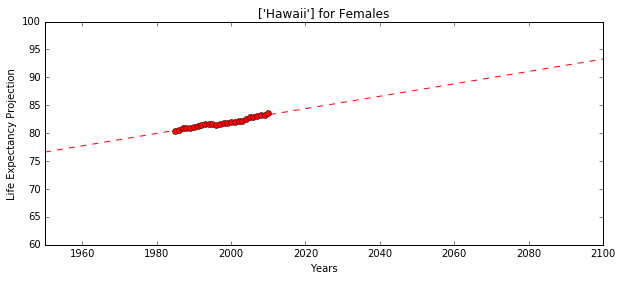

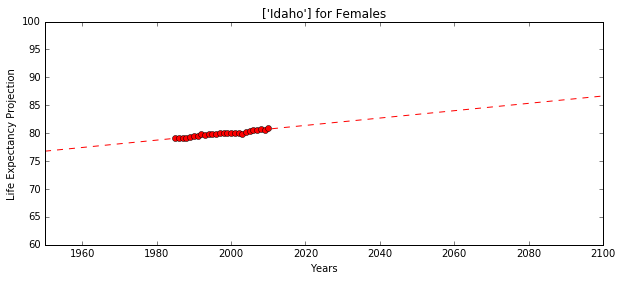

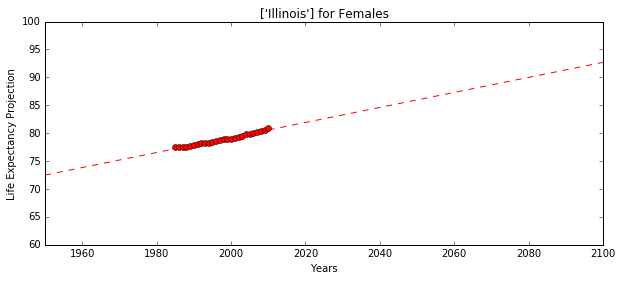

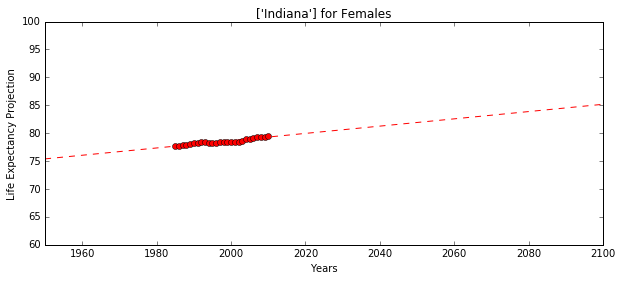

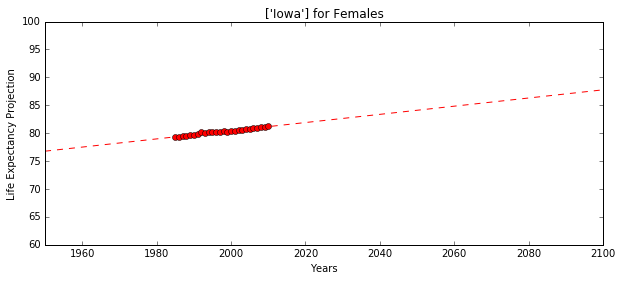

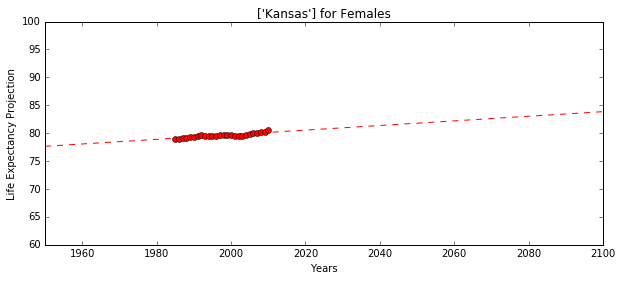

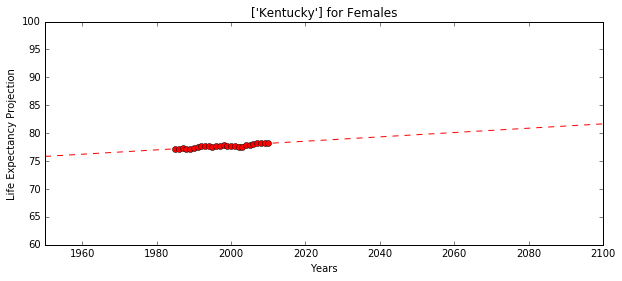

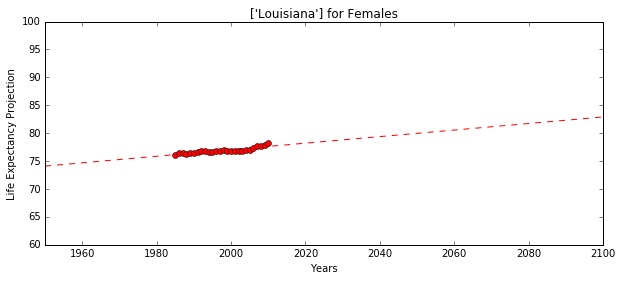

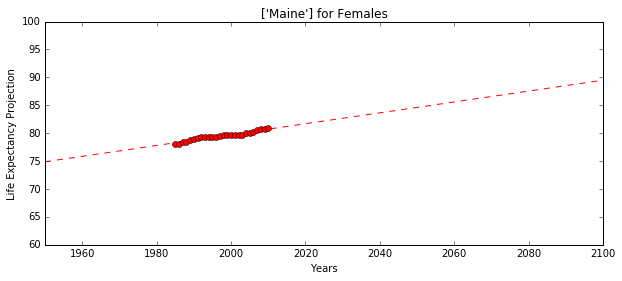

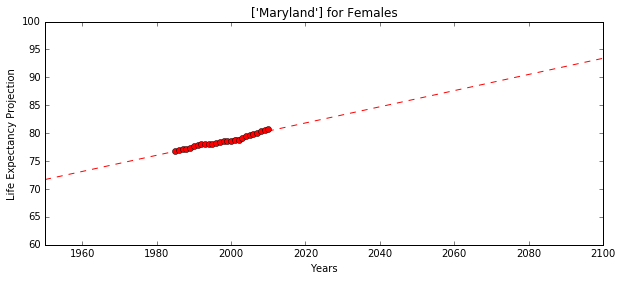

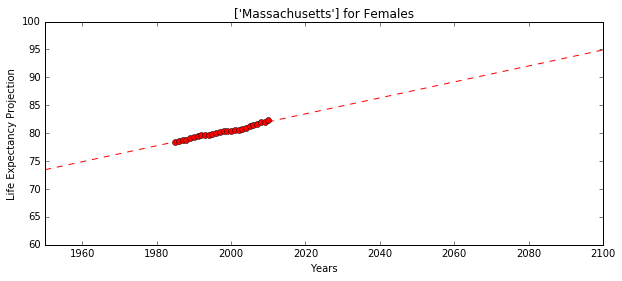

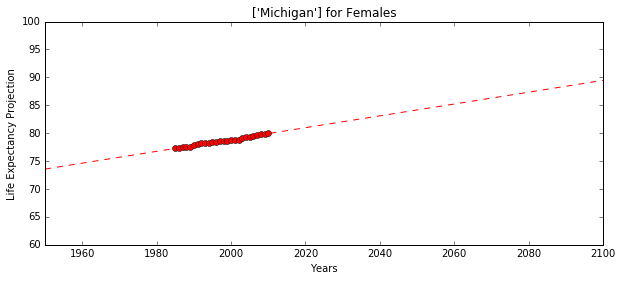

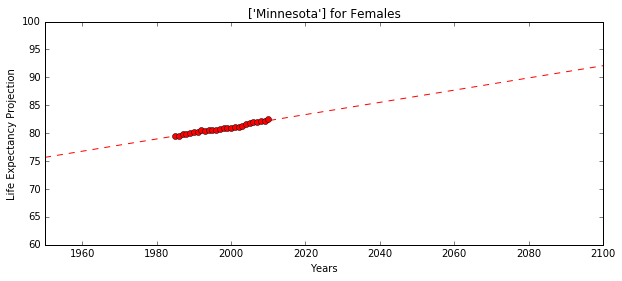

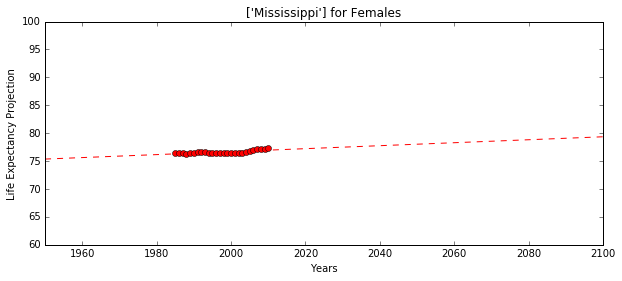

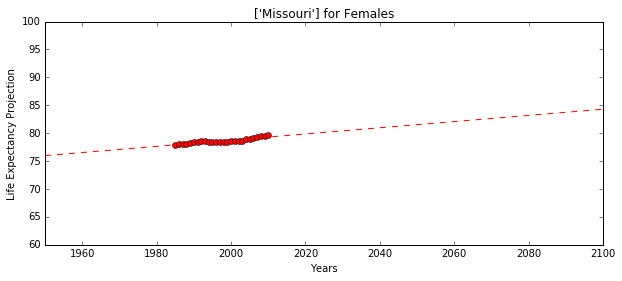

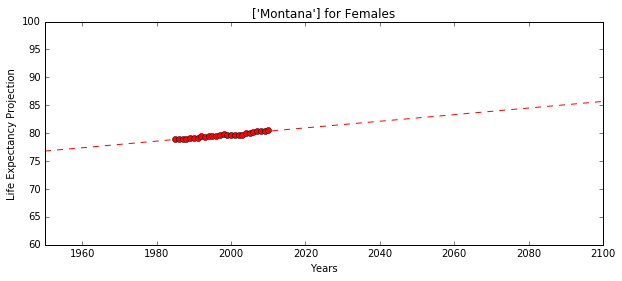

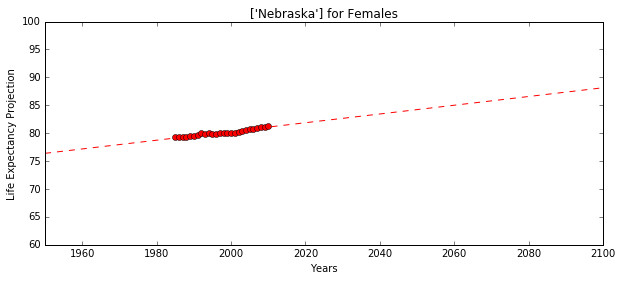

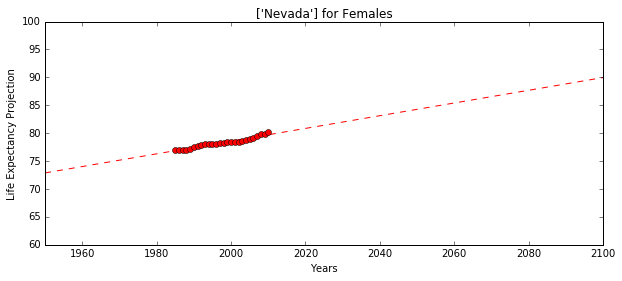

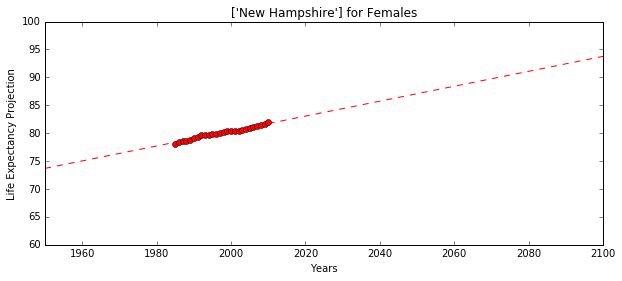

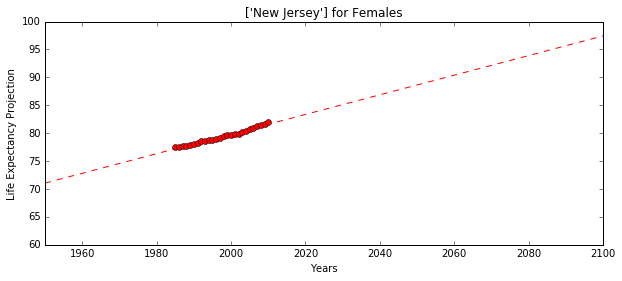

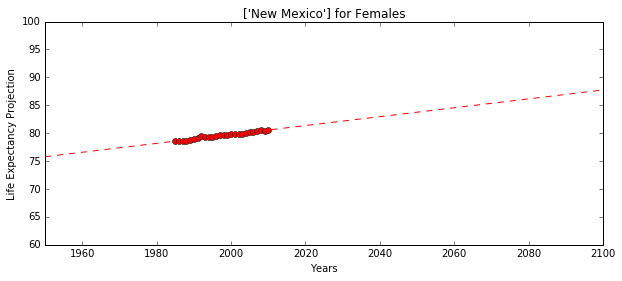

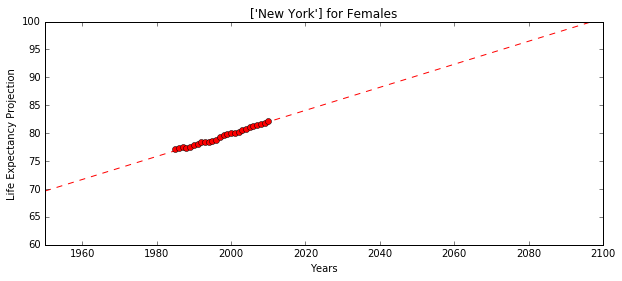

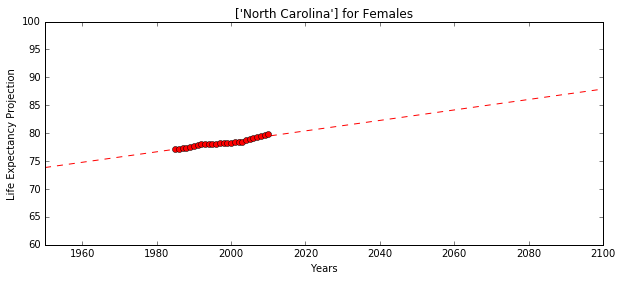

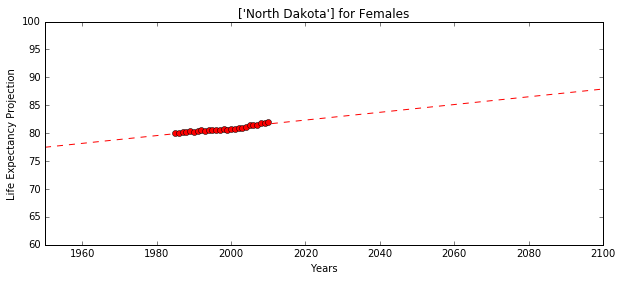

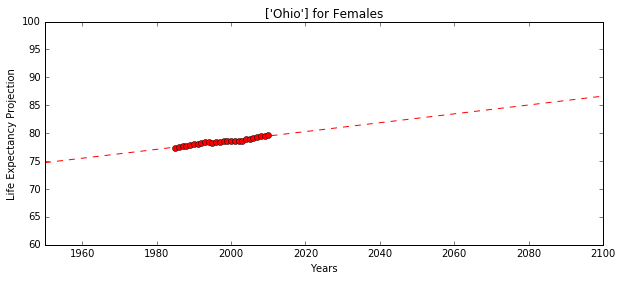

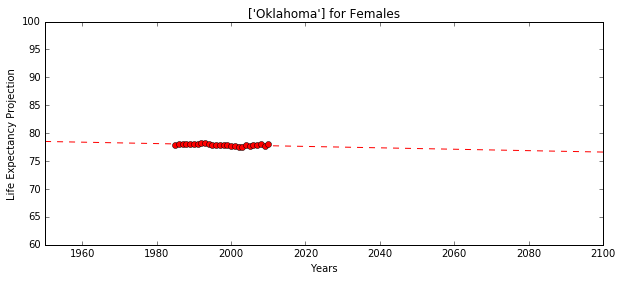

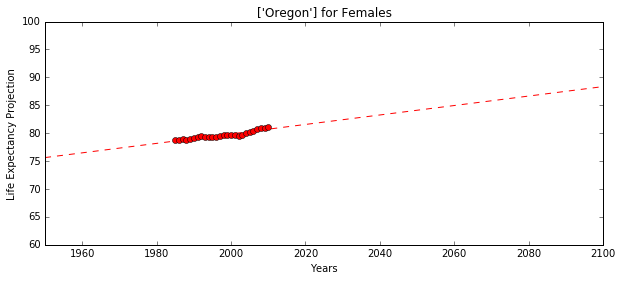

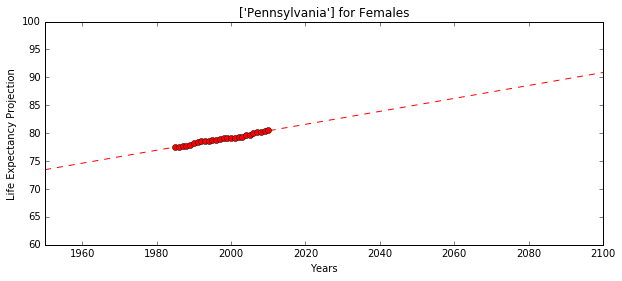

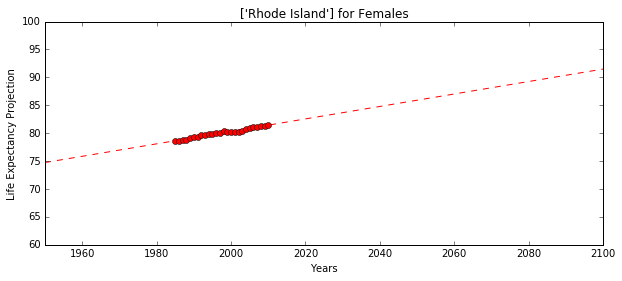

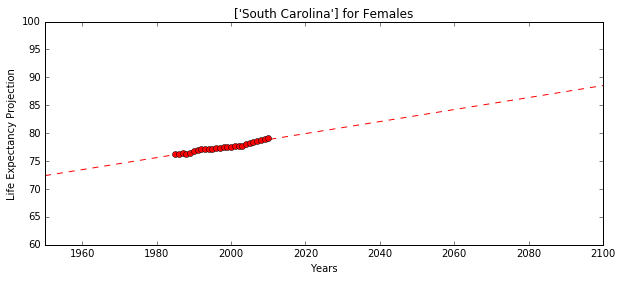

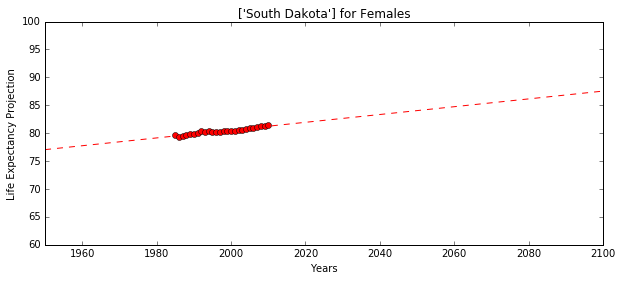

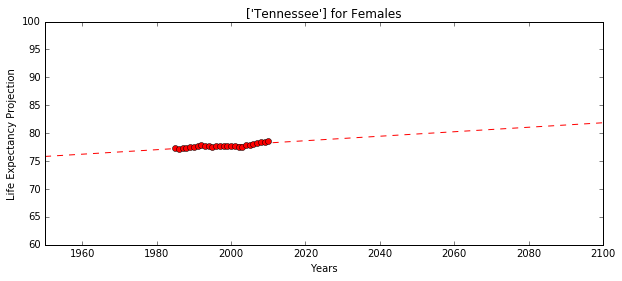

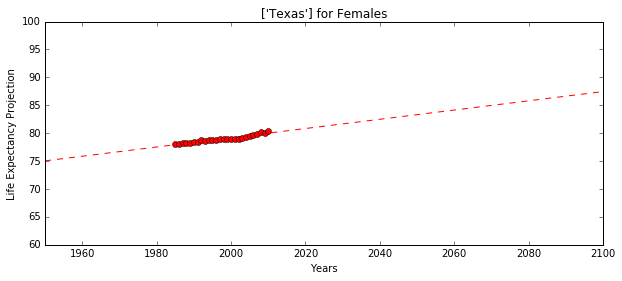

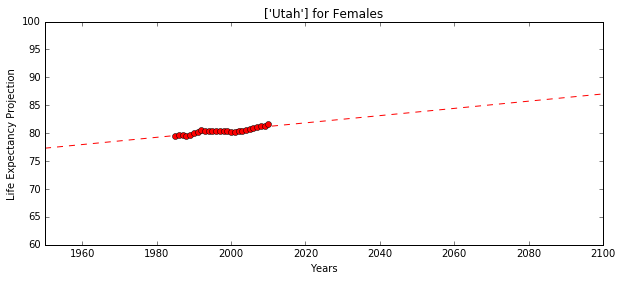

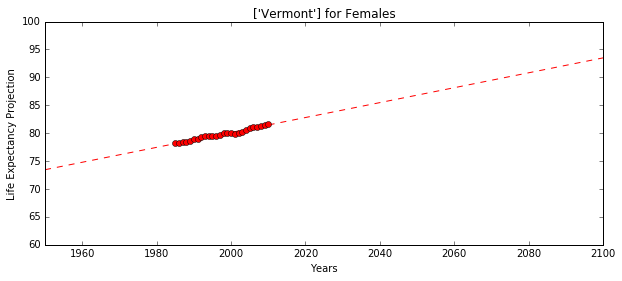

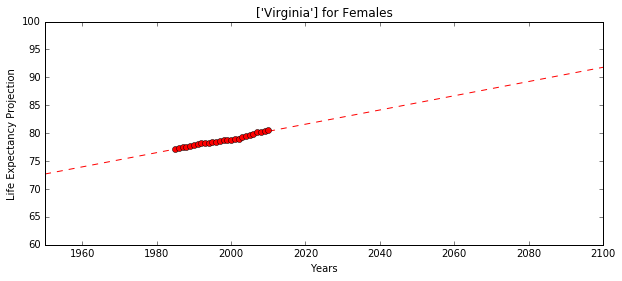

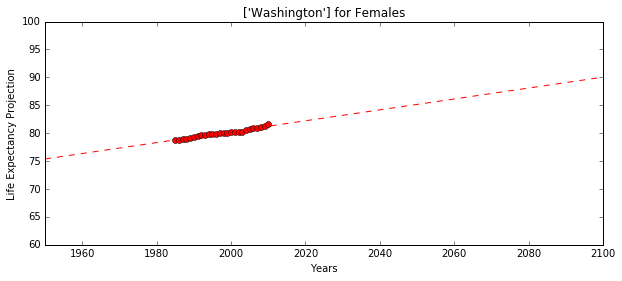

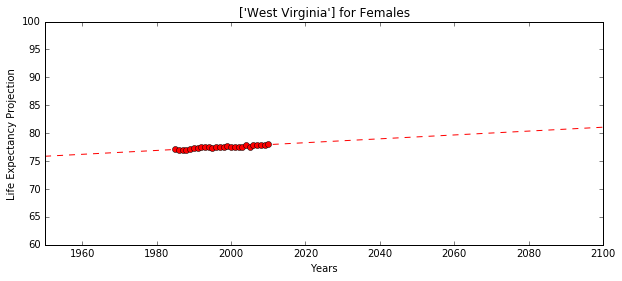

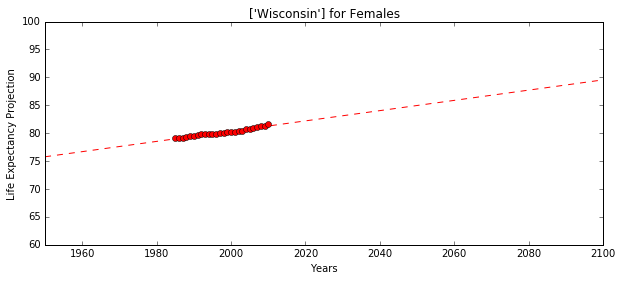

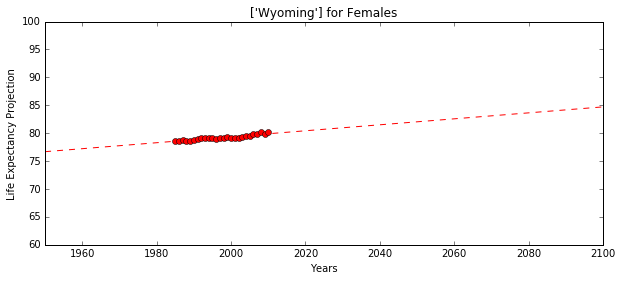

In [14]:
for k in range(0,len(projections_f)):
    plt.figure(figsize=(10,4))
    plt.plot([i for i in range(1950,2101)], projections_f[k], 'r--')
    plt.plot(states[k]['Year'], states[k]['female_le'], 'ro')
    plt.ylim(60,100)
    plt.xlim(1950,2100)
    plt.title(str(states[k]['State'].unique()) + ' for Females')
    plt.ylabel('Life Expectancy Projection')
    plt.xlabel('Years')

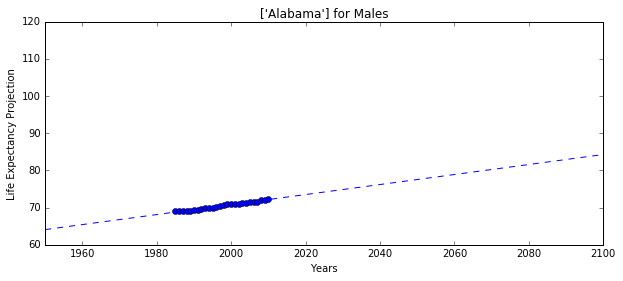

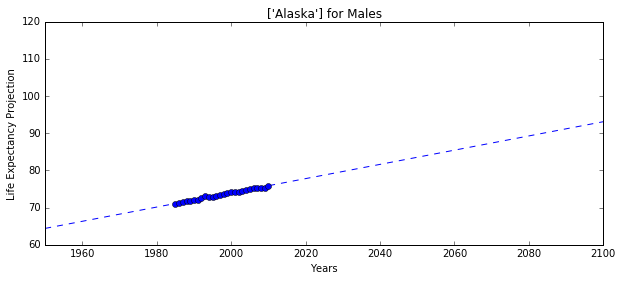

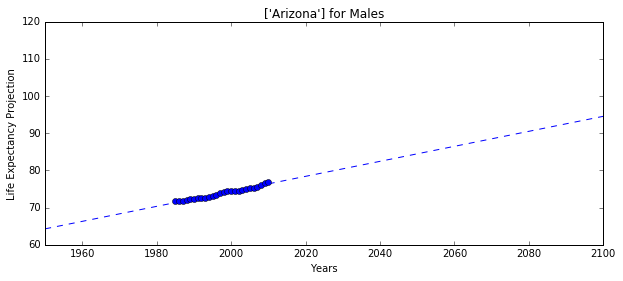

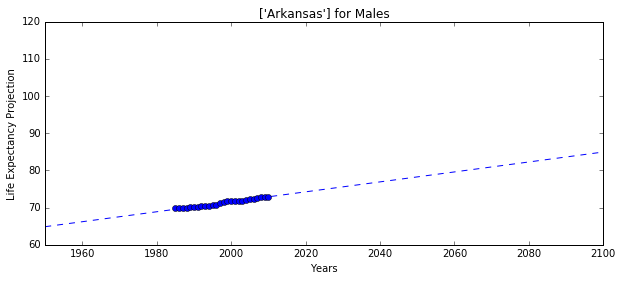

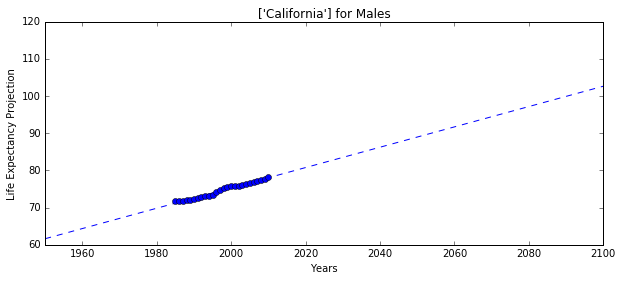

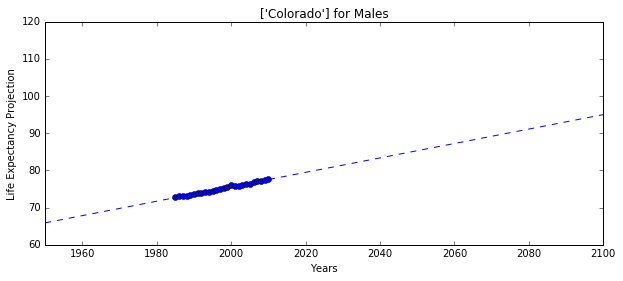

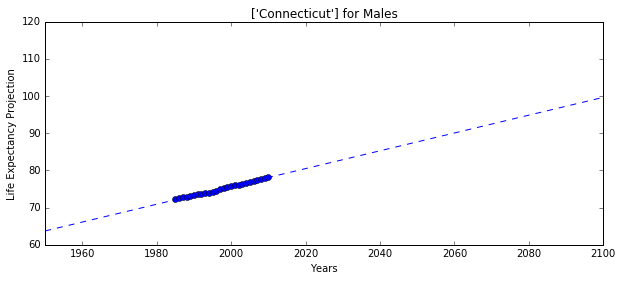

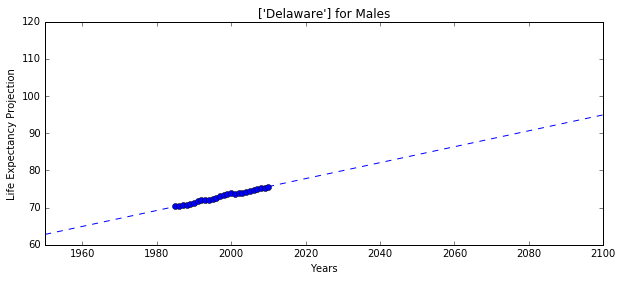

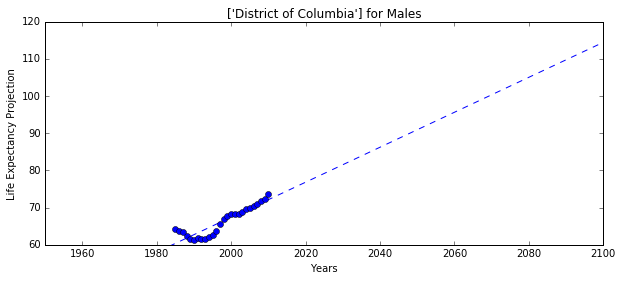

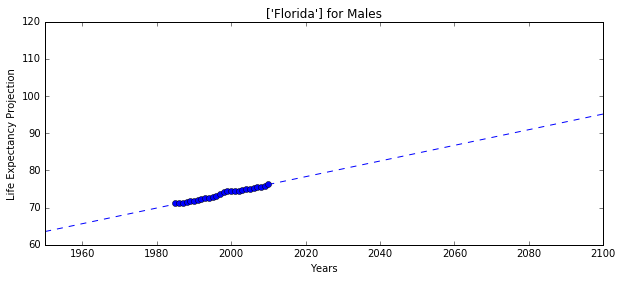

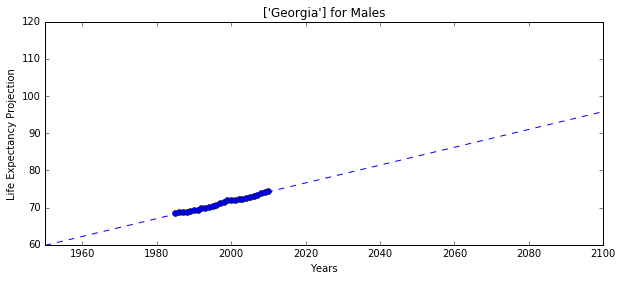

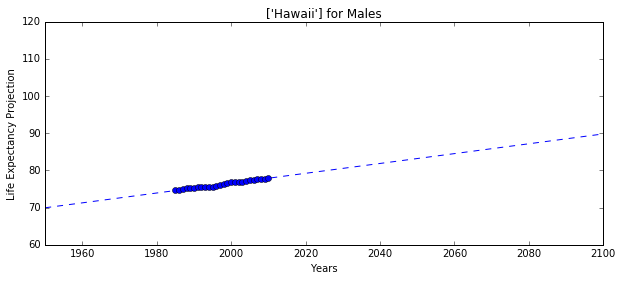

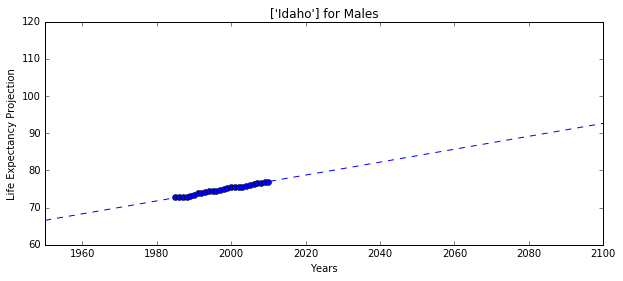

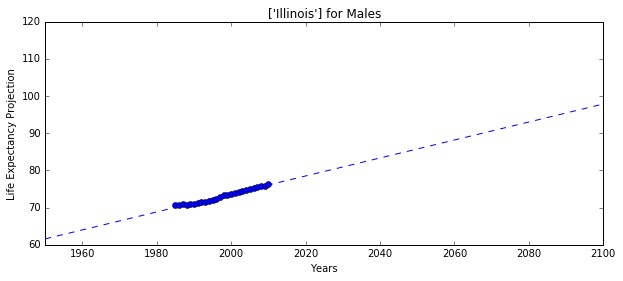

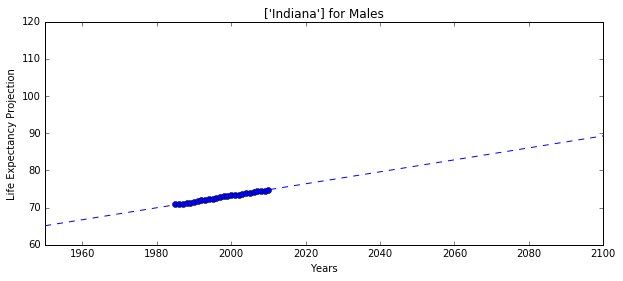

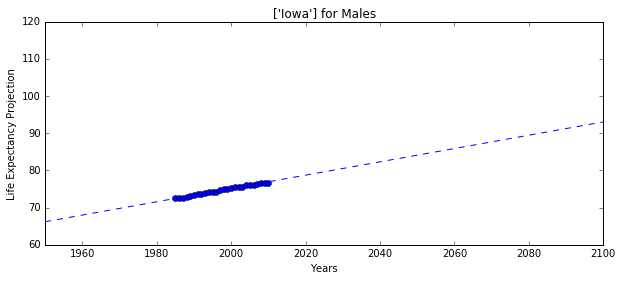

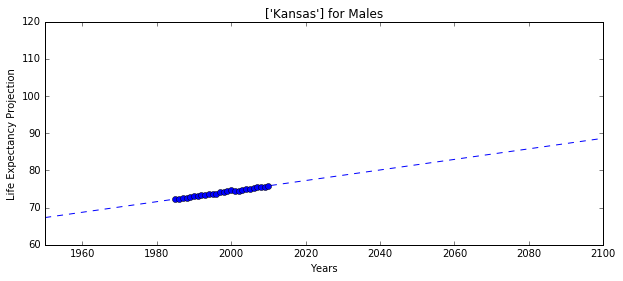

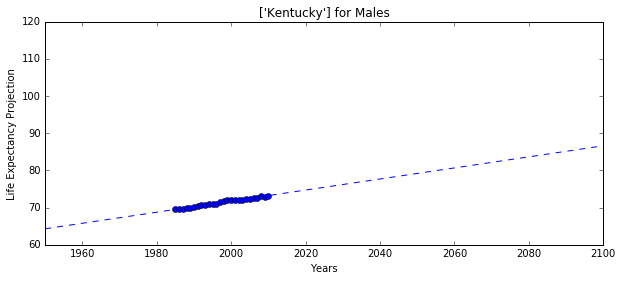

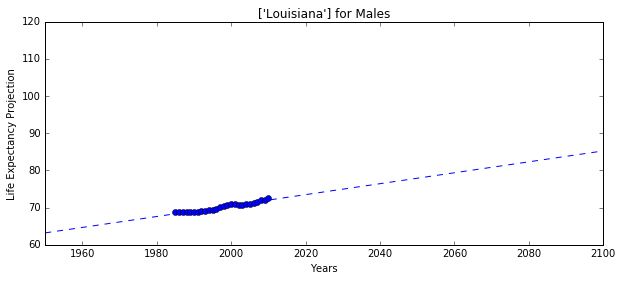

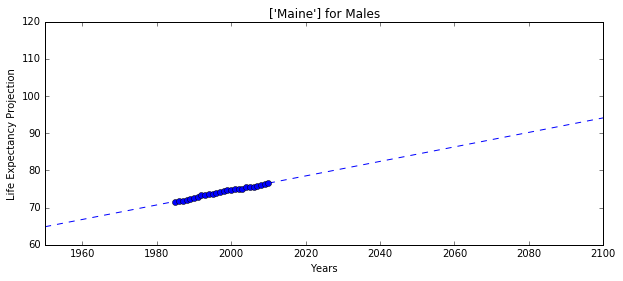

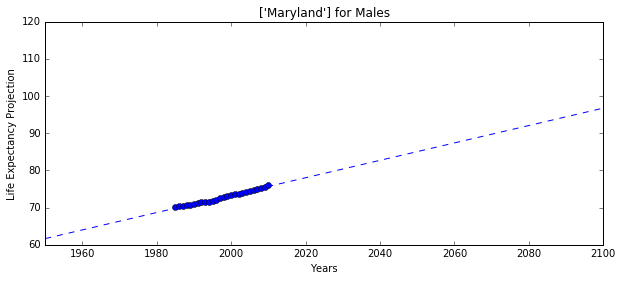

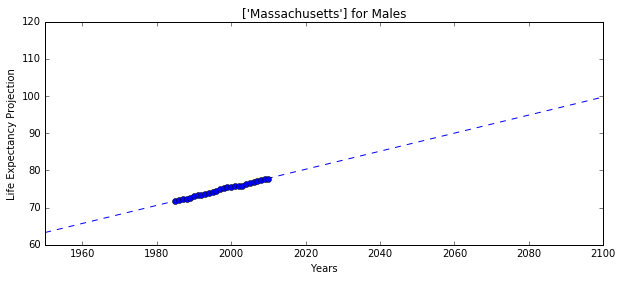

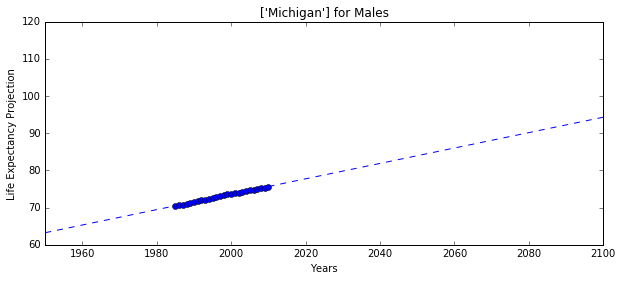

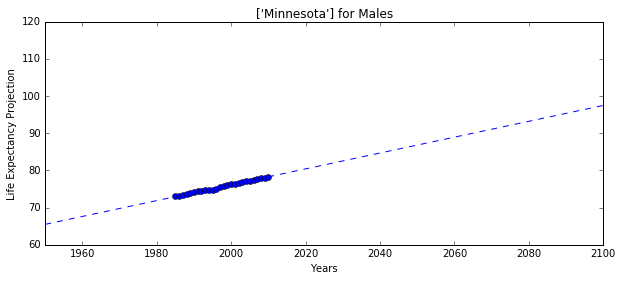

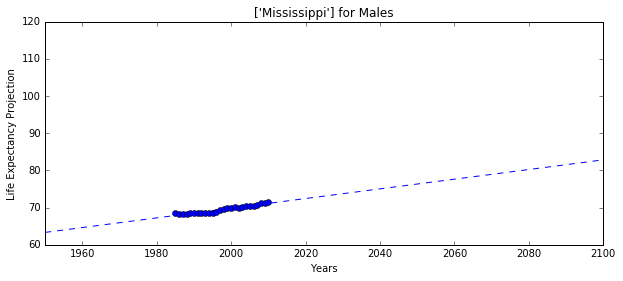

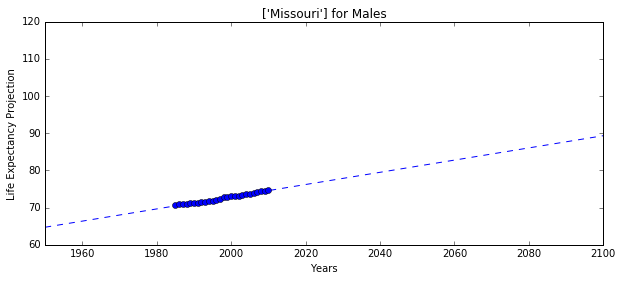

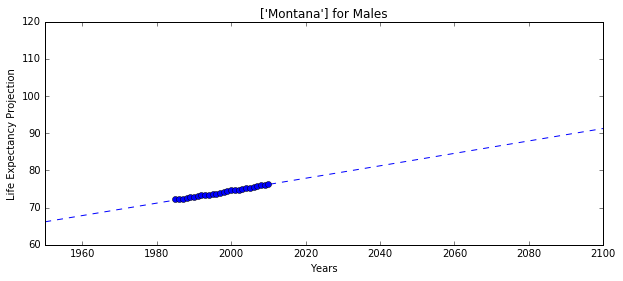

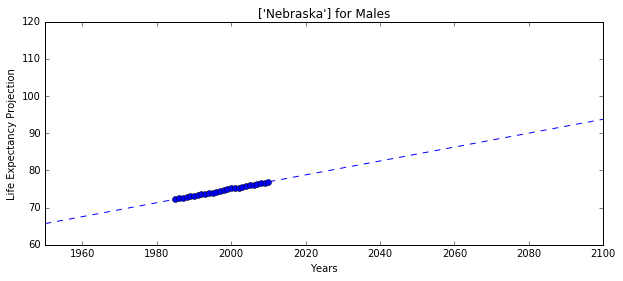

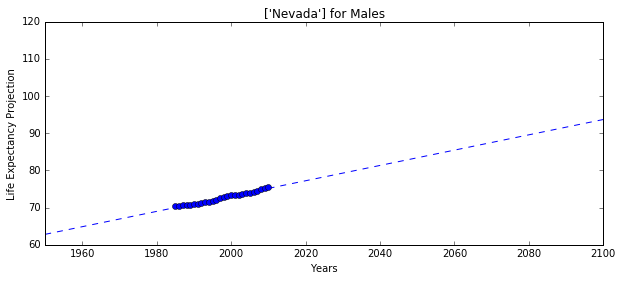

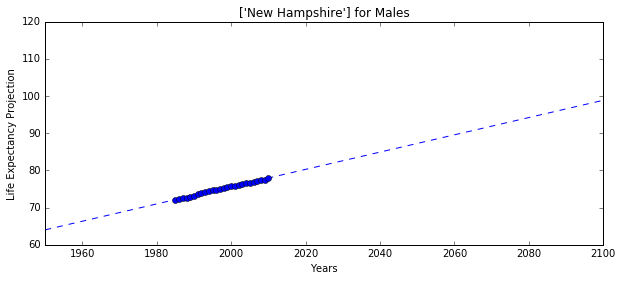

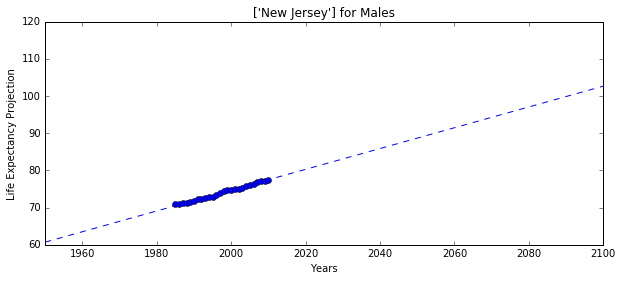

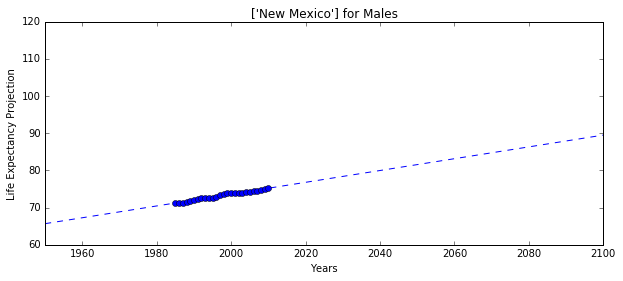

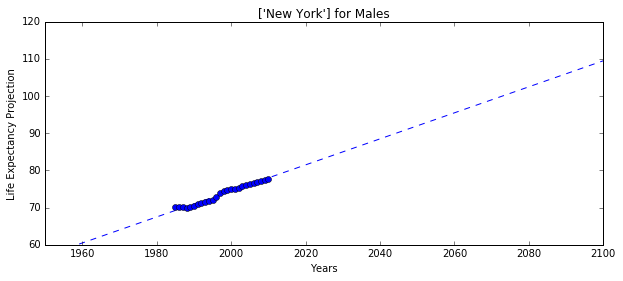

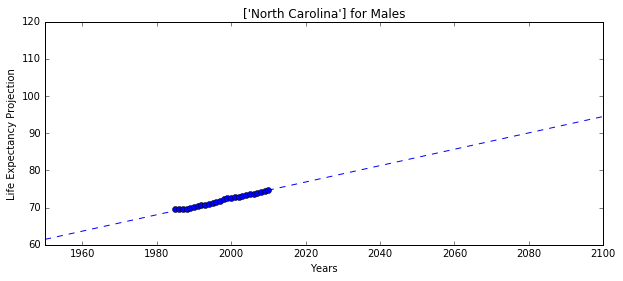

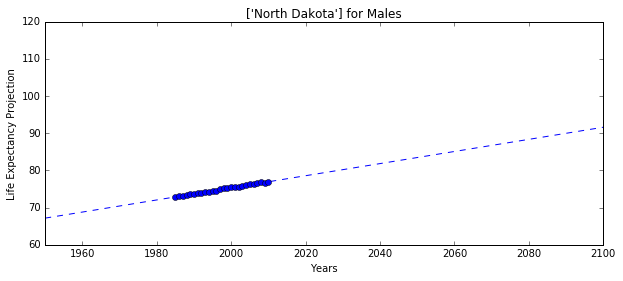

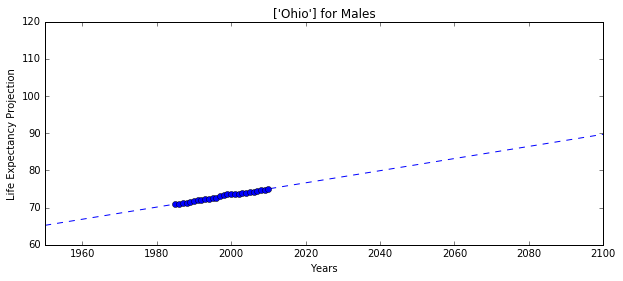

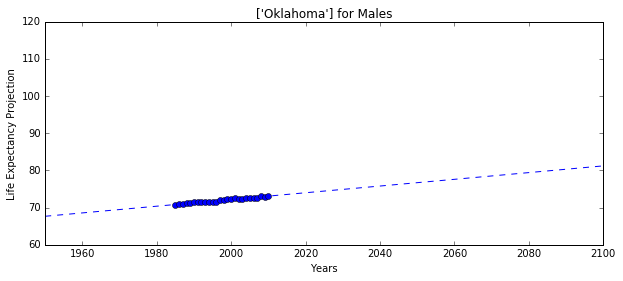

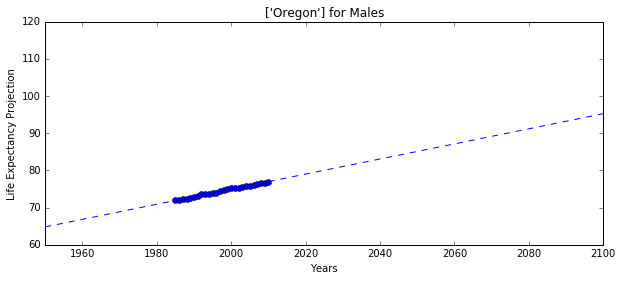

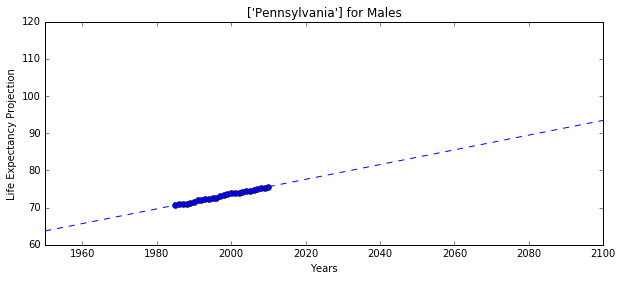

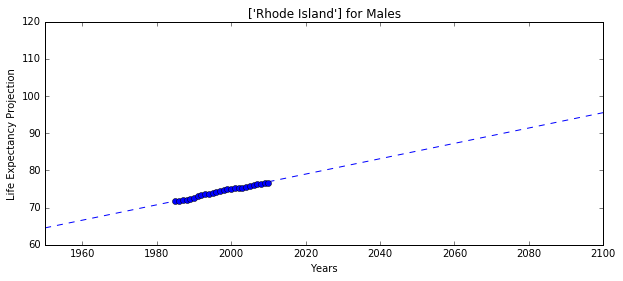

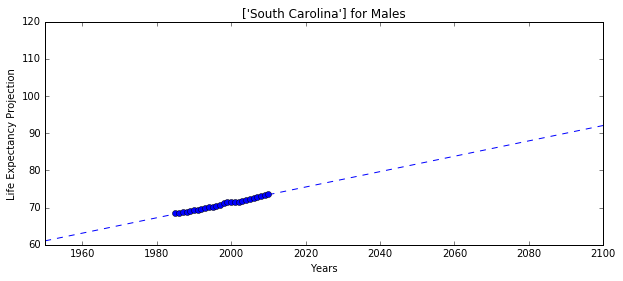

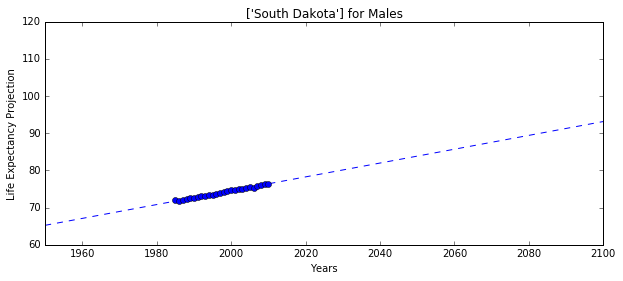

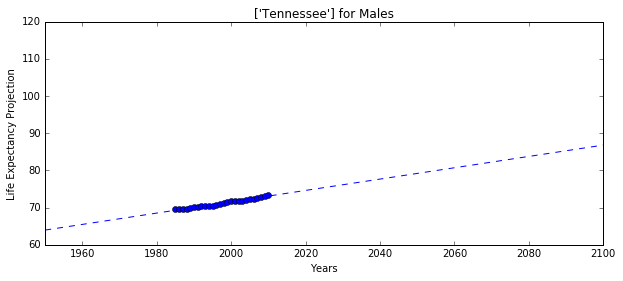

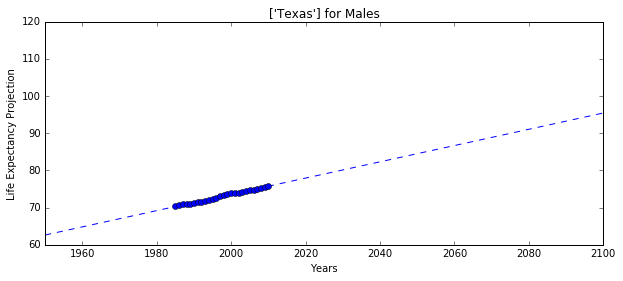

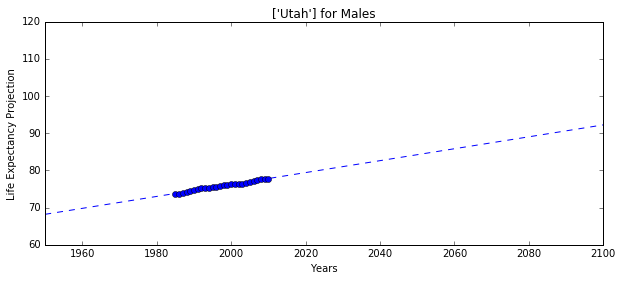

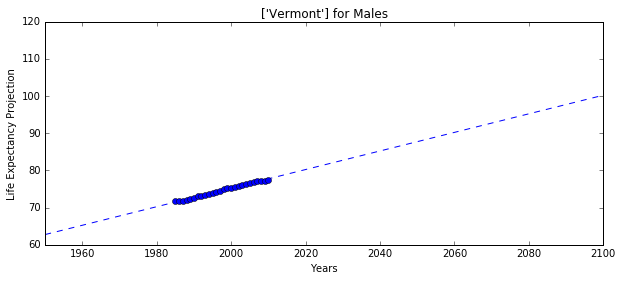

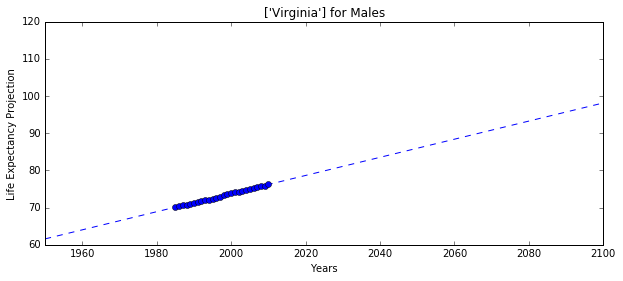

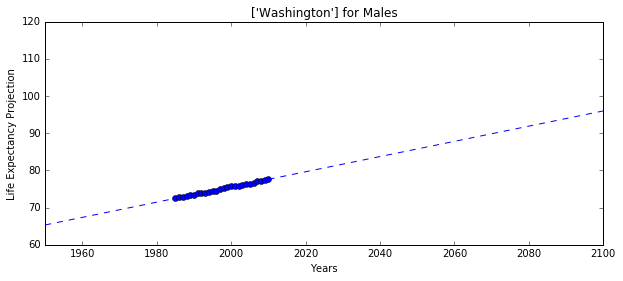

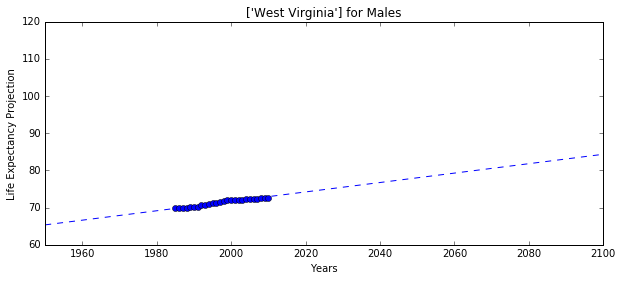

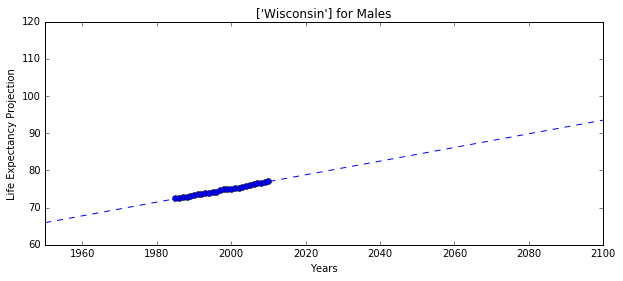

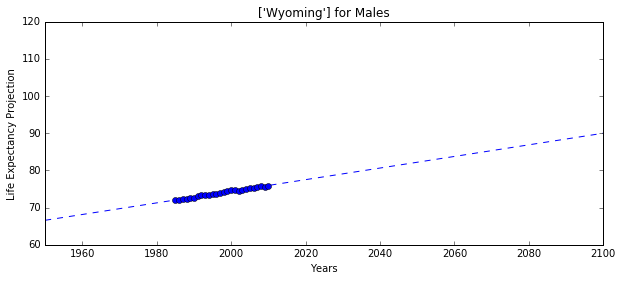

In [15]:
for k in range(0,len(projections_m)):
    plt.figure(figsize=(10,4))
    plt.plot([i for i in range(1950,2101)], projections_m[k], 'b--')
    plt.plot(states[k]['Year'], states[k]['male_le'], 'bo')
    plt.ylim(60,120)
    plt.xlim(1950,2100)
    plt.title(str(states[k]['State'].unique()) + ' for Males')
    plt.ylabel('Life Expectancy Projection')
    plt.xlabel('Years')

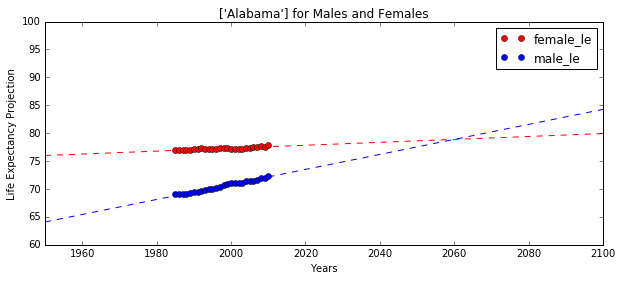

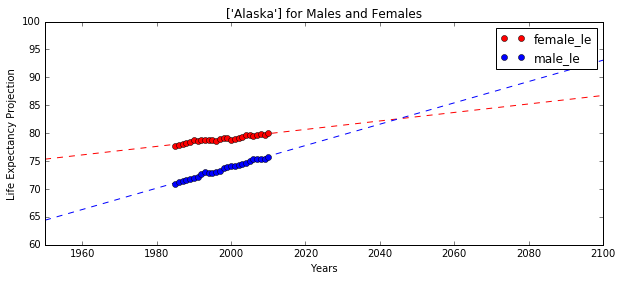

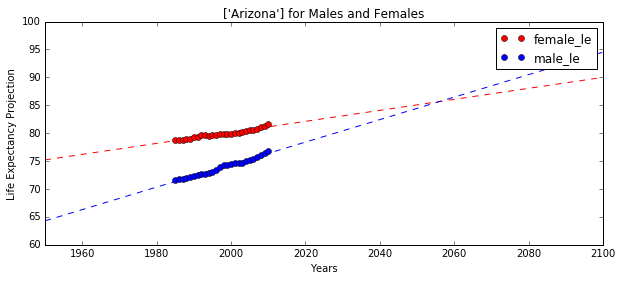

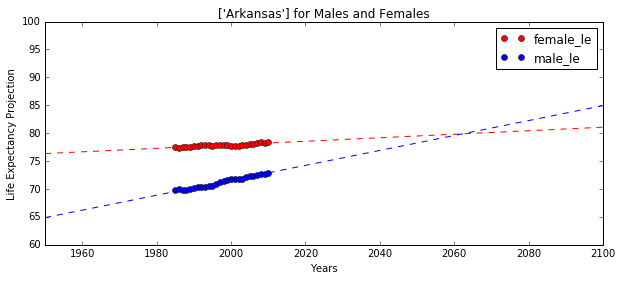

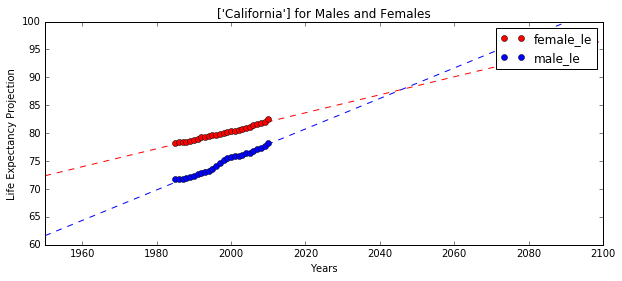

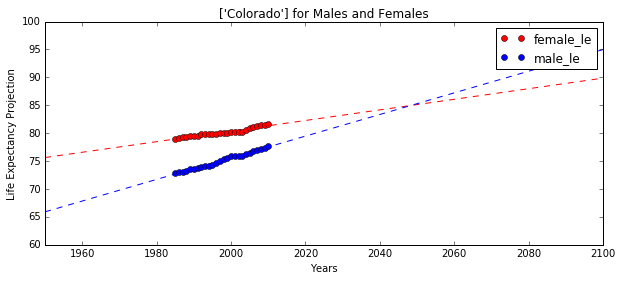

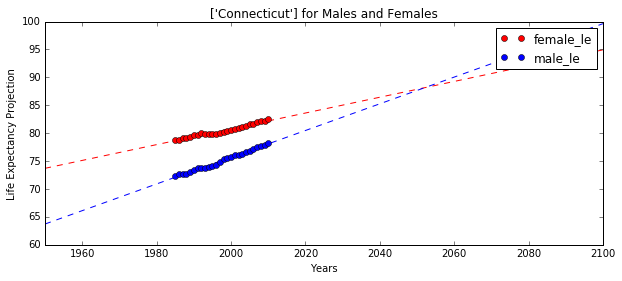

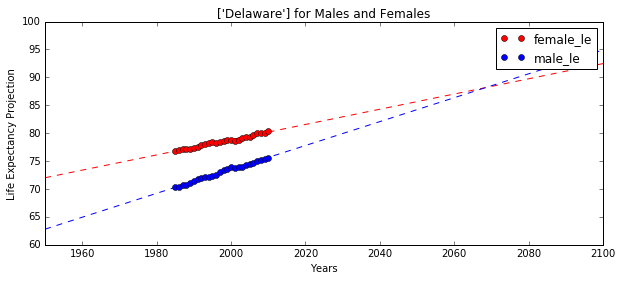

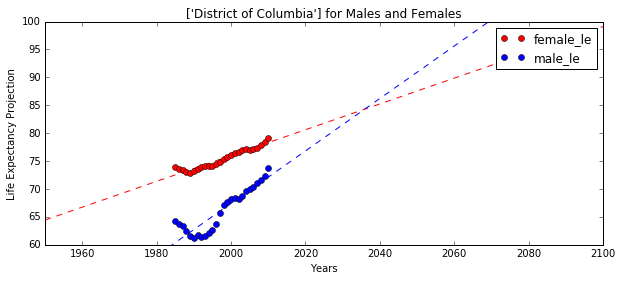

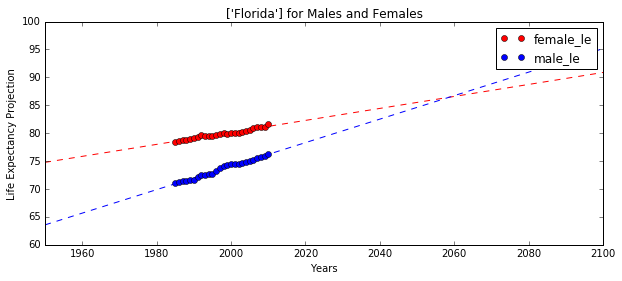

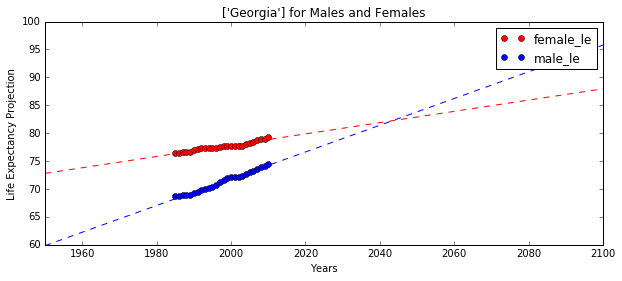

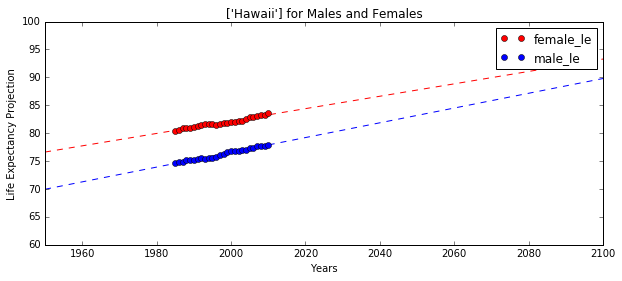

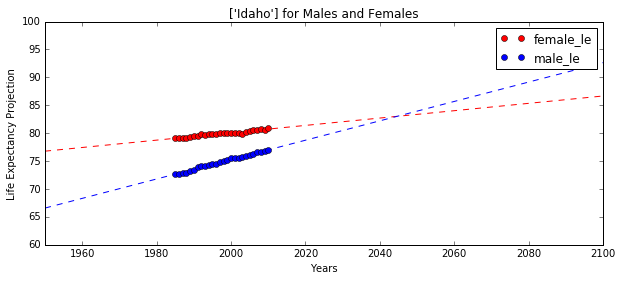

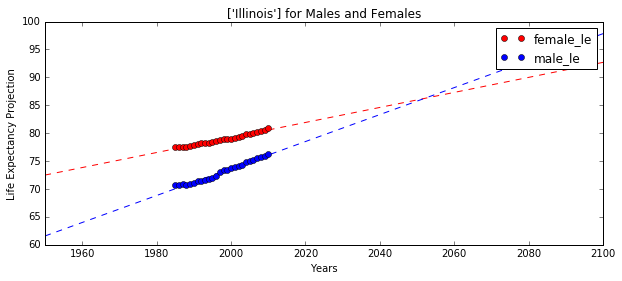

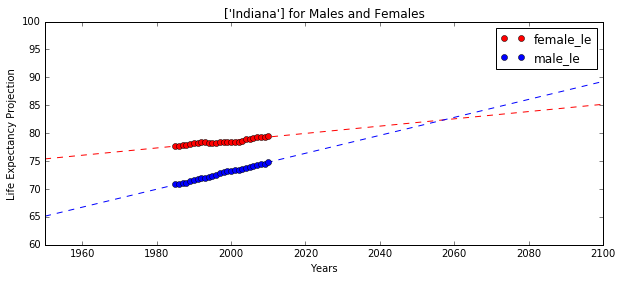

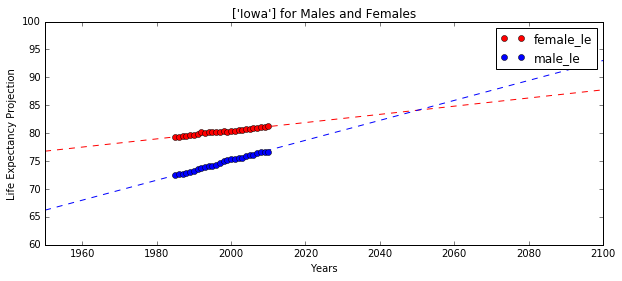

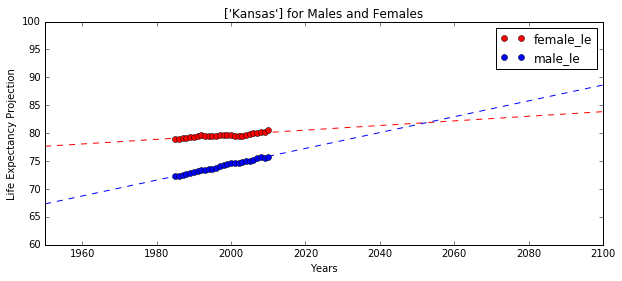

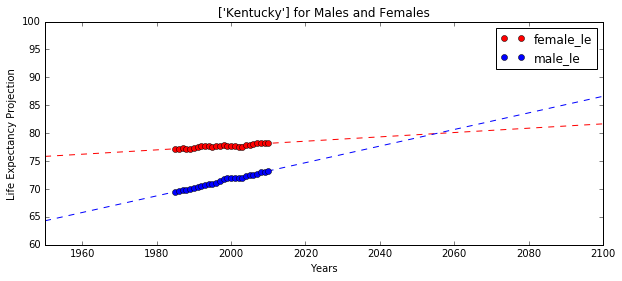

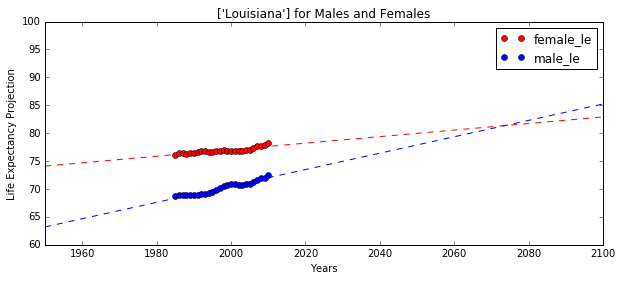

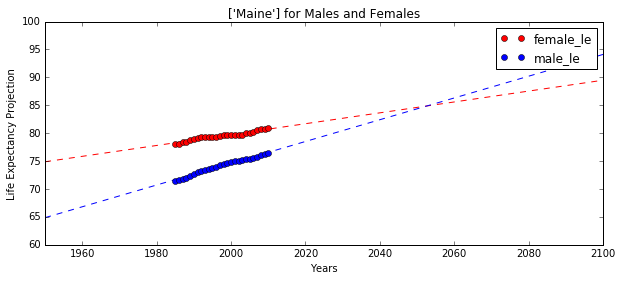

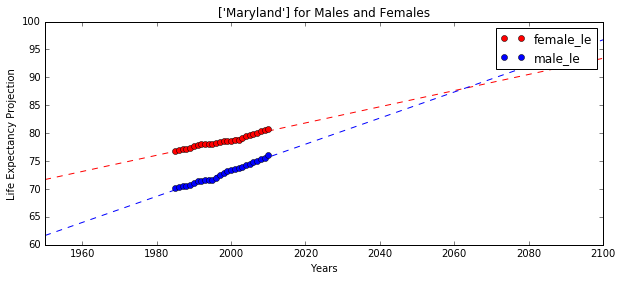

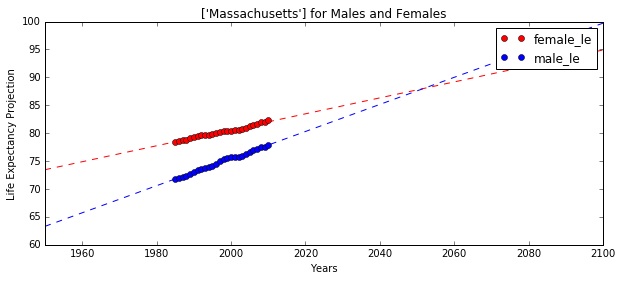

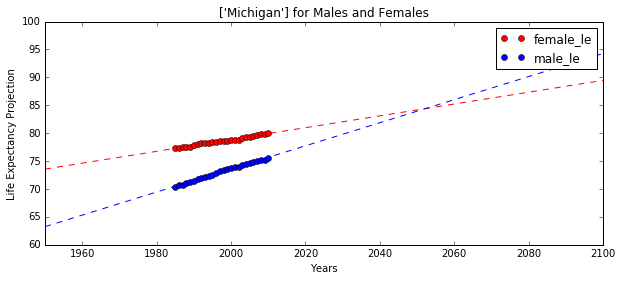

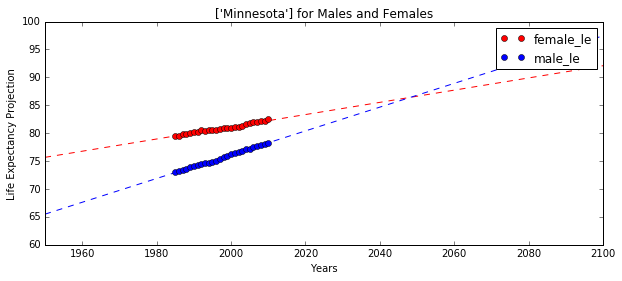

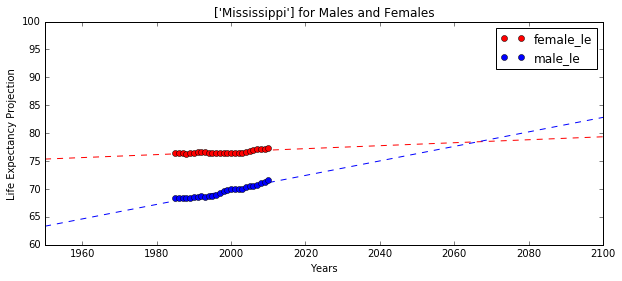

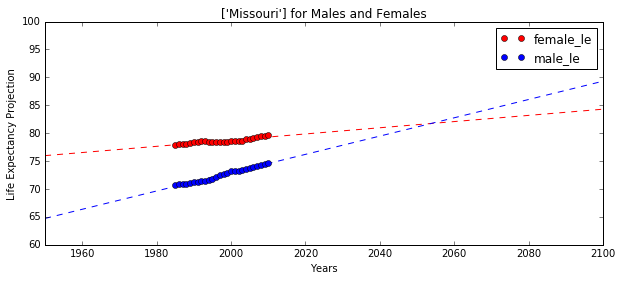

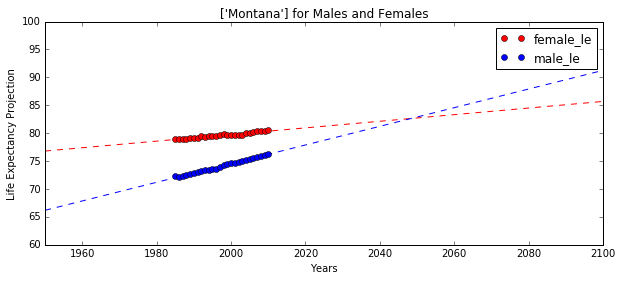

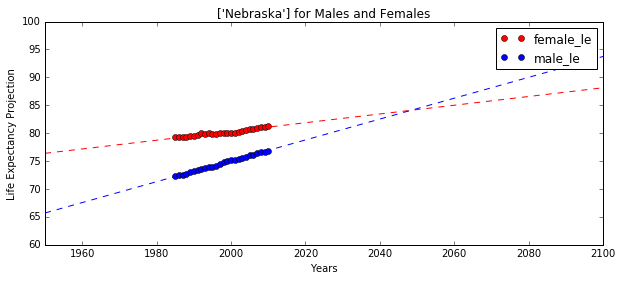

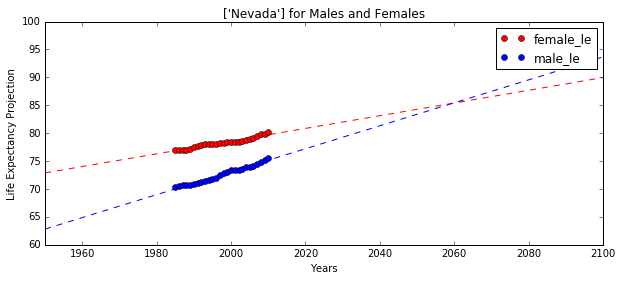

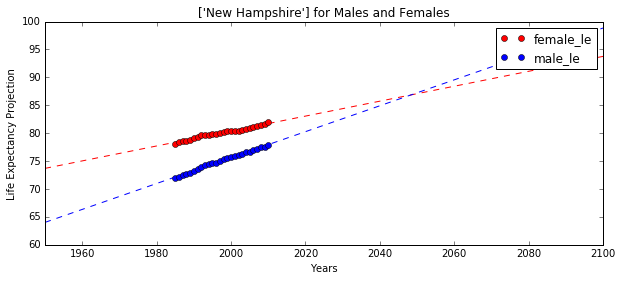

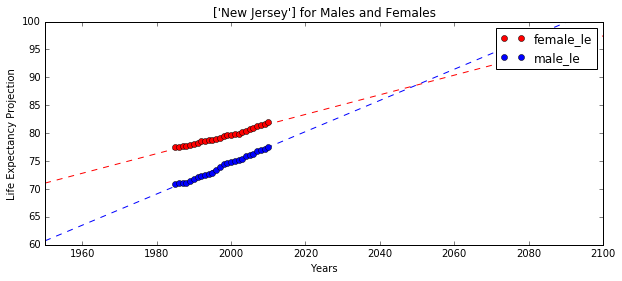

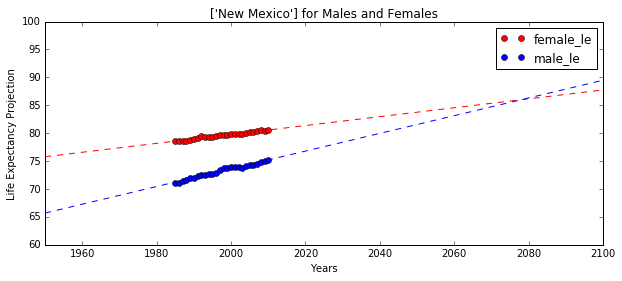

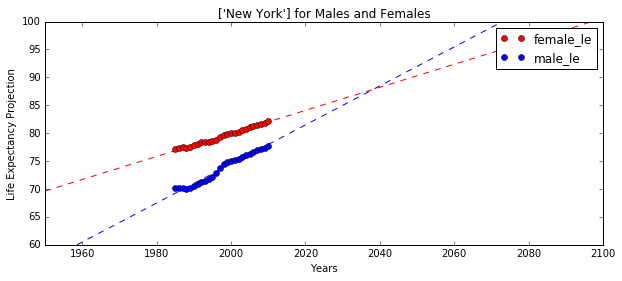

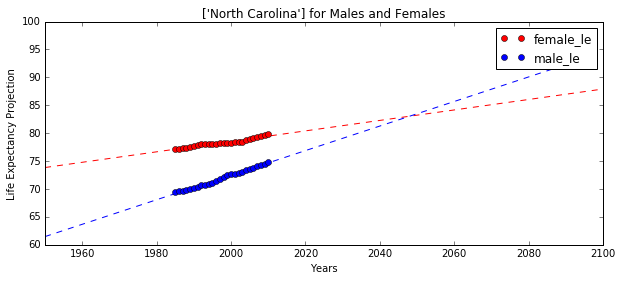

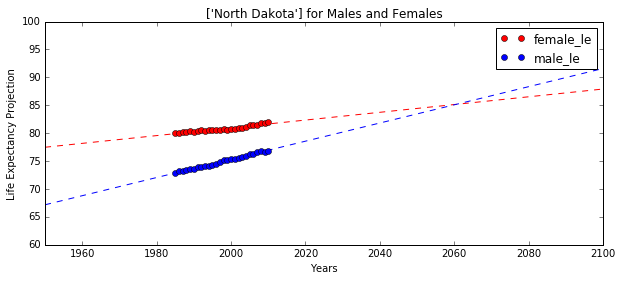

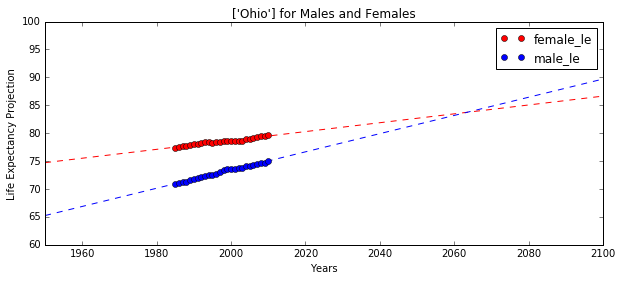

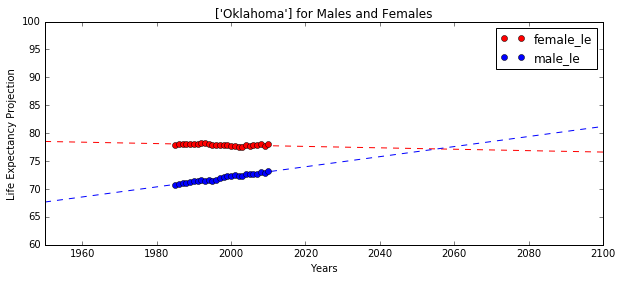

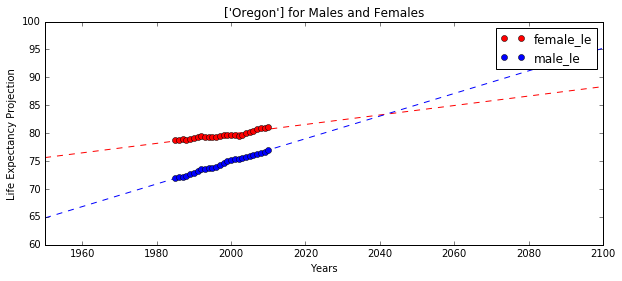

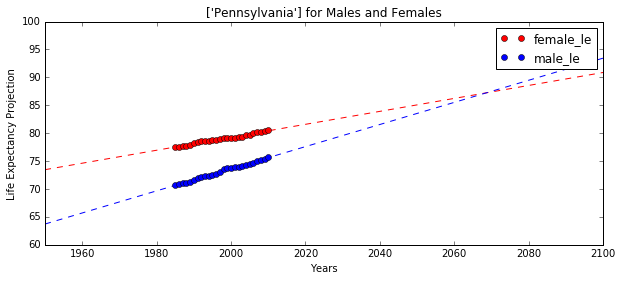

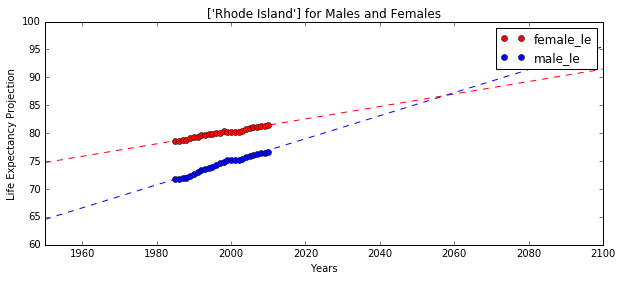

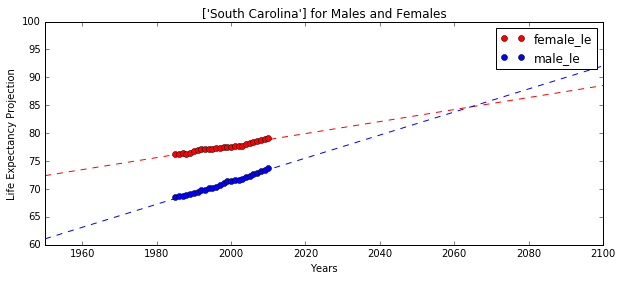

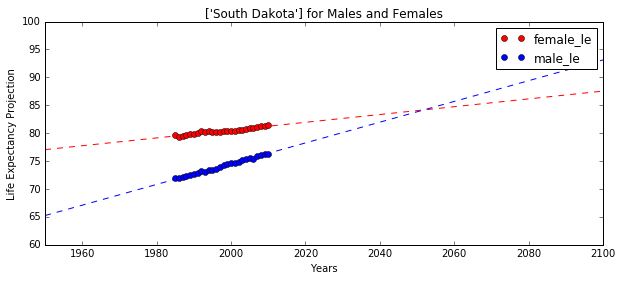

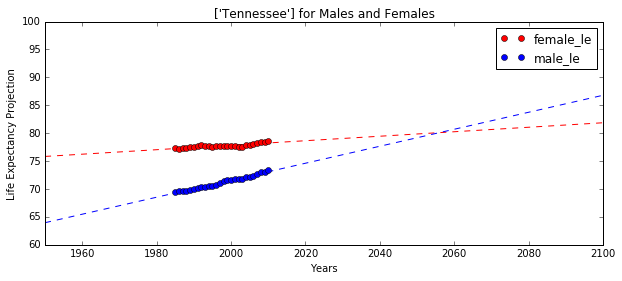

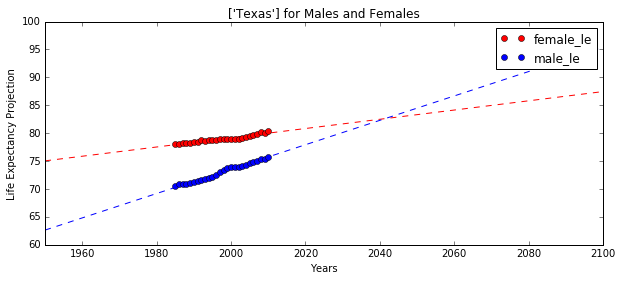

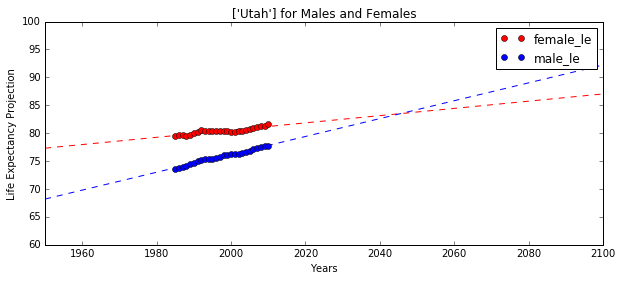

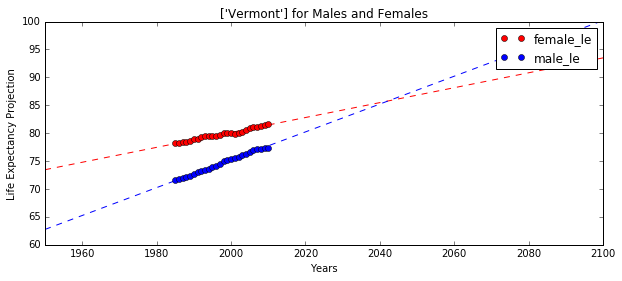

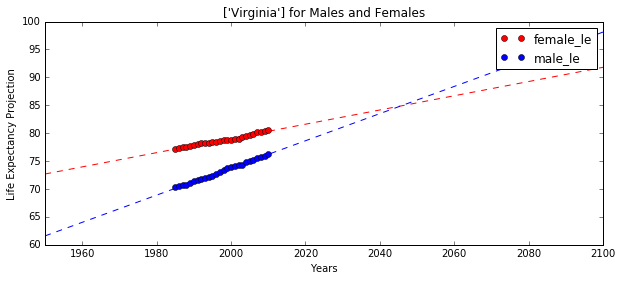

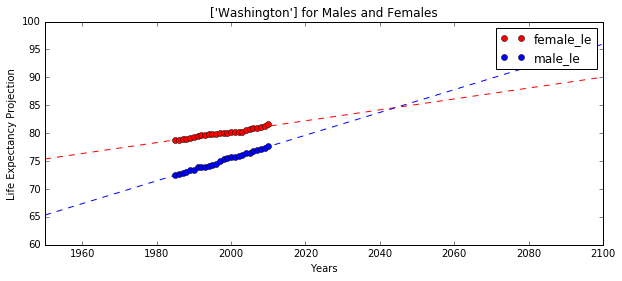

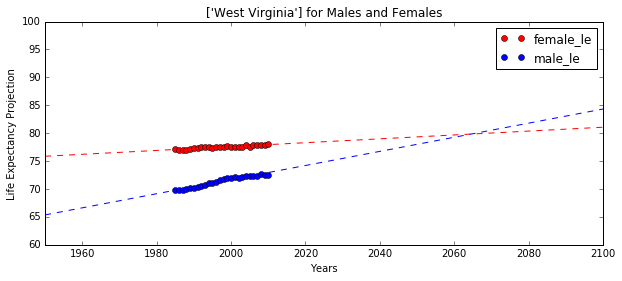

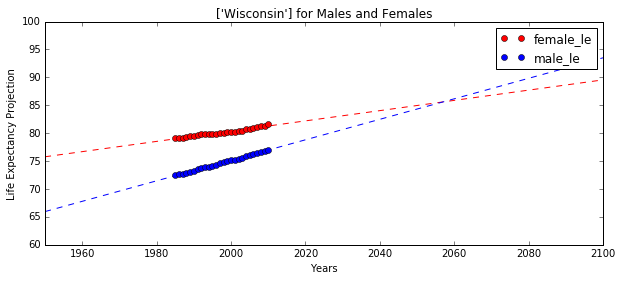

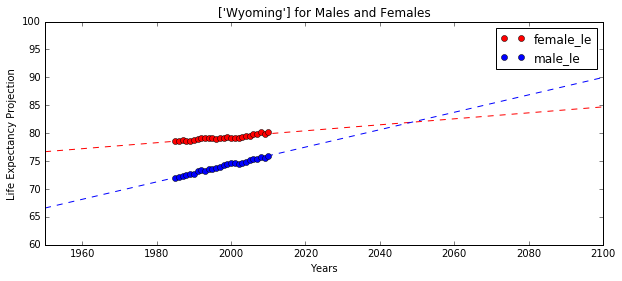

In [16]:
for k in range(0,len(projections_f)):
    plt.figure(figsize=(10,4))
    plt.plot([i for i in range(1950,2101)], projections_f[k], 'r--')
    plt.plot([i for i in range(1950,2101)], projections_m[k], 'b--')
    plt.plot(states[k]['Year'], states[k]['female_le'], 'ro')
    plt.plot(states[k]['Year'], states[k]['male_le'], 'bo')
    plt.ylim(60,100)
    plt.xlim(1950,2100)
    plt.title(str(states[k]['State'].unique()) + ' for Males and Females')
    plt.ylabel('Life Expectancy Projection')
    plt.xlabel('Years')
    plt.legend()

In [17]:
#plt.figure(figsize=(12,6))
#plt.bar([i for i in range(0,len(model_fit_f))], model_fit_f, alpha=.5, color='r')
#plt.xlim(0,51)
#plt.title('R Squared for Each State for Female Life Expectancy', fontsize=14)
#plt.xlabel

In [18]:
print 'FEMALE LE STATS'
print 'Mean rsquared (across all states): ' + str(np.mean(model_fit_f))
print 'Median rsquared (across all states): ' + str(np.median(model_fit_f))
for elem in model_names_f:
    if elem[1] == np.max(model_fit_f):
        print 'Max rsquared: ' + str(elem)
for elem in model_names_f:
    if elem[1] == np.min(model_fit_f):
        print 'Min rsquared: ' + str(elem)

FEMALE LE STATS
Mean rsquared (across all states): 0.901941376827
Median rsquared (across all states): 0.940614732402
Max rsquared: ('New York', 0.99035287111186576)
Min rsquared: ('Oklahoma', 0.29891573289693329)


In [19]:
#plt.figure(figsize=(12,6))
#plt.bar([i for i in range(0,len(model_fit_m))], model_fit_m, alpha=.5)
#plt.xlim(0,51)
#plt.title('R Squared for Each State for Male Life Expectancy', fontsize=14)

In [20]:
print 'MALE LE STATS'
print 'Mean rsquared (across all states): ' + str(np.mean(model_fit_m))
print 'Median rsquared (across all states): ' + str(np.median(model_fit_m))
for elem in model_names_m:
    if elem[1] == np.max(model_fit_m):
        print 'Max rsquared: ' + str(elem)
for elem in model_names_m:
    if elem[1] == np.min(model_fit_m):
        print 'Min rsquared: ' + str(elem)

MALE LE STATS
Mean rsquared (across all states): 0.982076333408
Median rsquared (across all states): 0.988702557096
Max rsquared: ('Nebraska', 0.99720274018891508)
Min rsquared: ('District of Columbia', 0.83220729142209326)


In [21]:
pf = pd.DataFrame(projections_f).T
pf.columns = [elem for elem in le['State'].unique() + '_f']
pf.index = [i for i in range(1950,2101)]

In [22]:
pm = pd.DataFrame(projections_m).T
pm.columns = [elem for elem in le['State'].unique() + '_m']
pm.index = [i for i in range(1950,2101)]

In [23]:
pf.head()

,Alabama_f,Alaska_f,Arizona_f,Arkansas_f,California_f,Colorado_f,Connecticut_f,Delaware_f,District of Columbia_f,Florida_f,...,South Dakota_f,Tennessee_f,Texas_f,Utah_f,Vermont_f,Virginia_f,Washington_f,West Virginia_f,Wisconsin_f,Wyoming_f
1950,76.002803,75.351368,75.222188,76.346376,72.379761,75.637350,73.709128,72.019521,64.439094,74.777368,...,77.056547,75.836872,75.045282,77.318701,73.459162,72.691265,75.384547,75.871145,75.777162,76.689111
1951,76.029036,75.427436,75.320790,76.377918,72.540964,75.732256,73.850677,72.155928,64.670287,74.884759,...,77.126482,75.877108,75.128062,77.383497,73.592759,72.818728,75.482297,75.905826,75.869036,76.742636
1952,76.055268,75.503504,75.419391,76.409460,72.702168,75.827162,73.992226,72.292335,64.901480,74.992150,...,77.196417,75.917344,75.210841,77.448294,73.726356,72.946191,75.580048,75.940506,75.960909,76.796161
1953,76.081501,75.579573,75.517993,76.441002,72.863371,75.922068,74.133774,72.428742,65.132674,75.099542,...,77.266352,75.957579,75.293621,77.513091,73.859952,73.073655,75.677798,75.975186,76.052783,76.849685
1954,76.107733,75.655641,75.616595,76.472544,73.024574,76.016974,74.275323,72.565149,65.363867,75.206933,...,77.336287,75.997815,75.376400,77.577887,73.993549,73.201118,75.775549,76.009867,76.144656,76.903210


In [24]:
pmf = pd.merge(pf, pm, left_index=True, right_index=True)

In [25]:
pmf.iloc[30:40]

,Alabama_f,Alaska_f,Arizona_f,Arkansas_f,California_f,Colorado_f,Connecticut_f,Delaware_f,District of Columbia_f,Florida_f,...,South Dakota_m,Tennessee_m,Texas_m,Utah_m,Vermont_m,Virginia_m,Washington_m,West Virginia_m,Wisconsin_m,Wyoming_m
1980,76.789778,77.633419,78.180239,77.292632,77.215863,78.484530,77.955590,76.111726,71.374889,77.999111,...,70.822205,68.529538,69.194034,73.007299,70.249248,68.902188,71.465333,69.153692,71.468547,71.273436
1981,76.816010,77.709487,78.278841,77.324174,77.377067,78.579436,78.097138,76.248133,71.606082,78.106503,...,71.008123,68.681785,69.412595,73.167497,70.498851,69.145733,71.669600,69.280185,71.652256,71.429415
1982,76.842243,77.785556,78.377443,77.355716,77.538270,78.674342,78.238687,76.384540,71.837275,78.213894,...,71.194041,68.834031,69.631156,73.327696,70.748455,69.389279,71.873867,69.406677,71.835966,71.585395
1983,76.868475,77.861624,78.476044,77.387258,77.699474,78.769248,78.380236,76.520947,72.068468,78.321285,...,71.379959,68.986277,69.849716,73.487894,70.998058,69.632824,72.078133,69.533169,72.019675,71.741374
1984,76.894708,77.937692,78.574646,77.418800,77.860677,78.864154,78.521785,76.657354,72.299662,78.428677,...,71.565877,69.138523,70.068277,73.648092,71.247662,69.876369,72.282400,69.659662,72.203385,71.897354
1985,76.920940,78.013761,78.673248,77.450342,78.021880,78.959060,78.663333,76.793761,72.530855,78.536068,...,71.751795,69.290769,70.286838,73.808291,71.497265,70.119915,72.486667,69.786154,72.387094,72.053333
1986,76.947173,78.089829,78.771850,77.481884,78.183084,79.053966,78.804882,76.930168,72.762048,78.643460,...,71.937713,69.443015,70.505398,73.968489,71.746868,70.363460,72.690933,69.912646,72.570803,72.209313
1987,76.973405,78.165897,78.870451,77.513426,78.344287,79.148872,78.946431,77.066574,72.993241,78.750851,...,72.123631,69.595262,70.723959,74.128687,71.996472,70.607005,72.895200,70.039138,72.754513,72.365292
1988,76.999638,78.241966,78.969053,77.544968,78.505491,79.243778,79.087979,77.202981,73.224434,78.858243,...,72.309549,69.747508,70.942520,74.288885,72.246075,70.850550,73.099467,70.165631,72.938222,72.521272
1989,77.025870,78.318034,79.067655,77.576509,78.666694,79.338684,79.229528,77.339388,73.455627,78.965634,...,72.495467,69.899754,71.161080,74.449084,72.495679,71.094096,73.303733,70.292123,73.121932,72.677251


In [26]:
pf.to_csv('female_projections')
pm.to_csv('male_projections')
pmf.to_csv('female_male_projections')

### New York

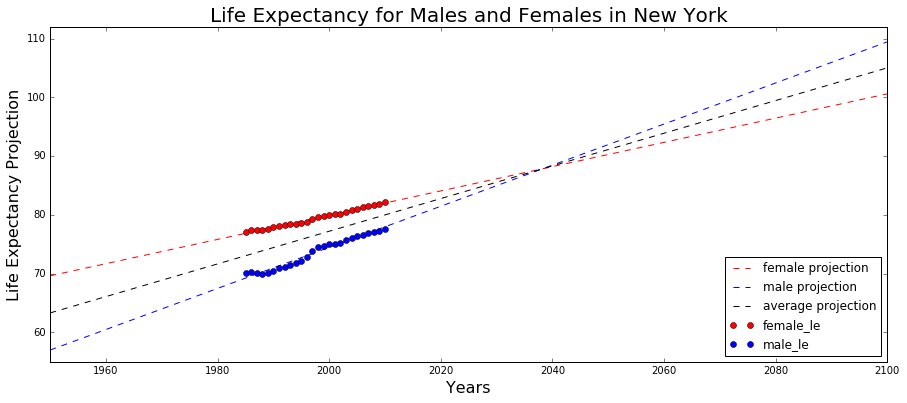

In [27]:
plt.figure(figsize=(15,6))
plt.plot([i for i in range(1950,2101)], projections_f[32], 'r--', label='female projection')
plt.plot([i for i in range(1950,2101)], projections_m[32], 'b--', label='male projection')
plt.plot([i for i in range(1950,2101)], list((projections_f[32] + projections_m[32])/2.0), 'k--', label='average projection')
plt.plot(states[32]['Year'], states[32]['female_le'], 'ro')
plt.plot(states[32]['Year'], states[32]['male_le'], 'bo')
plt.ylim(55,112)
plt.xlim(1950,2100)
plt.title('Life Expectancy for Males and Females in New York', fontsize=20)
plt.ylabel('Life Expectancy Projection', fontsize=16)
plt.xlabel('Years', fontsize=16)
plt.legend(loc=4)
savefig('ny.png')

### DC

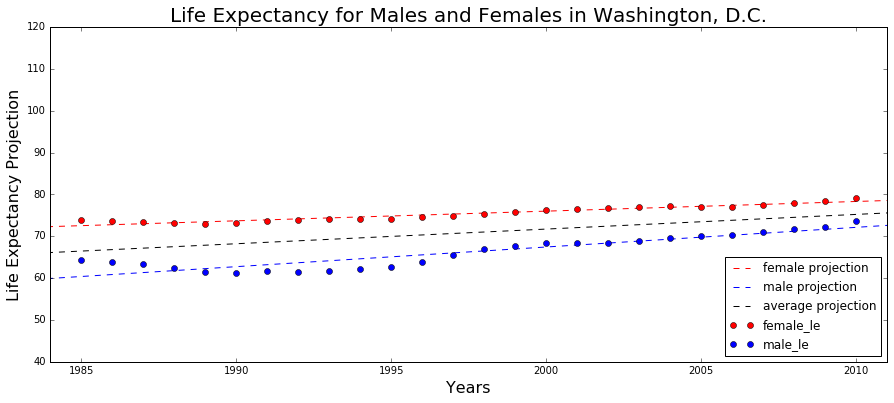

In [28]:
plt.figure(figsize=(15,6))
plt.plot([i for i in range(1950,2101)], projections_f[8], 'r--', label='female projection')
plt.plot([i for i in range(1950,2101)], projections_m[8], 'b--', label='male projection')
plt.plot([i for i in range(1950,2101)], list((projections_f[8] + projections_m[8])/2.0), 'k--', label='average projection')
plt.plot(states[8]['Year'], states[8]['female_le'], 'ro')
plt.plot(states[8]['Year'], states[8]['male_le'], 'bo')
plt.ylim(40,120)
plt.xlim(1984,2011)
plt.title('Life Expectancy for Males and Females in Washington, D.C.', fontsize=20)
plt.ylabel('Life Expectancy Projection', fontsize=16)
plt.xlabel('Years', fontsize=16)
plt.legend(loc=4)
savefig('dc.png')